# Lead Scoring Case Study - Group Assignment 

# Contents rough outline
    1. Pre-Data Analysis
        1.1. Importing toolkits 
        1.2. Coding style
                
    2. Reading and Inspecting
        2.1. Understanding the Dataset
        2.2  Visualising the Imported Data
                  
    3. Data cleaning and prepration
        3.1. Spelling corrections/renaming the variables 
        3.2. Drop Unnecessary Columns
        
    4. EDA the Imported Data
        3.1. Univariate Analysis
        3.2. Bivariate Analysis
        
    5. Handeling Categorical variables
        4.1 Creating Dummy variables(Dummification!)
        
    6. Splitting the Data into Training and Testing Sets
        5.1 Rescaling
        5.2 Dividing into X and Y sets for the model building
        
    7. Recursive feature elimination- RFE
        6.1  Building models
        6.2  Residual Analysis
        6.3 Predictions
        
    8. Conclusions

# Step 1: Importing the Toolkits
Let's start with the following steps:

Importing data using the pandas library
Understanding the structure of the data

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [159]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [160]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [161]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [162]:
import statsmodels.api as sm

In [163]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Code Style Used
- camelCase for functions, objects and classes
- snake_case for variables
- single quotes over double quotes
- throw away variables start with '_'

# Step 2: Reading and Understanding the Data

In [165]:
# Importing all datasets
leads = pd.read_csv("Leads.csv")
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [166]:
pd.set_option('max_columns',None)

In [167]:
leads

Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
5     2058ef08-2858-443e-a01f-a9237db2f5ce       660680   
6     9fae7df4-169d-489b-afe4-0f3d752542ed       660673   
7     20ef72a2-fb3b-45e0-924e-551c5fa59095       660664   
8     cfa0128c-a0da-4656-9d47-0aa4e67bf690       660624   
9     af465dfc-7204-4130-9e05-33231863c4b5       660616   
10    2a369e35-ca95-4ca9-9e4f-9d27175aa320       660608   
11    9bc8ce93-6144-49e0-9f9d-080fc980f83c       660570   
12    8bf76a52-2478-476b-8618-1688e07874ad       660562   
13    88867067-3750-4753-8d33-1c7d1db53b5e       660558   
14    a8531c22-fcf1-48f8-a711-fb5abf98ad87       660553   
15    25f4ac14-ff4b-4cd2-9c61-b44c85e19c8f       660547   
16    3abb7c77-1634-4083-9a9f-861068220611       660540   
17    e5c3beca-a0b6-4b3f-8c01-0919fb9ca3f2       660534   
18    82cb5fb0-2d97-4a39-a630-ab5fe2e7f18c       660522   
19    4512c16a-e96a-4459-b9ec-c7d8fe8c4880       660509   
20    c4419c99-b002-408b-a6fd-fa100716592c       660479   
21    fd71ab5b-53b8-4105-9960-efedc44962fa       660478   
22    8fd38b83-5c32-4277-bcfb-499f34a01c56       660471   
23    ecbc6e69-29a9-44bf-804a-13079ef301bc       660461   
24    ecd117ca-375f-49ea-afd6-b52b84d00c69       660458   
25    31c326f0-4a9b-43a6-9006-99d3830fbcae       660447   
26    c494aca4-8c8e-4081-9784-41eb6346015e       660432   
27    6d143c0e-abae-425f-a2c0-52c2946cbd45       660424   
28    8247051c-f838-4a41-b39c-1f0b44c3d5e6       660423   
29    b3455e2e-8236-478a-b1aa-666ad3381722       660410   
...                                    ...          ...   
9210  14ac6418-af18-4acd-b464-02f6e0fefa1c       579833   
9211  8458b410-48fe-4bcd-aecf-5813b6006ee2       579832   
9212  0c15052a-9f8a-47c4-9fc3-eb20c84ffd74       579830   
9213  d4587acb-02d1-4c5e-9110-6032d829bac1       579822   
9214  479a8b1c-d410-4220-a24f-854a376be43d       579808   
9215  06334ac1-64a8-444c-92a7-117dcd26dea5       579802   
9216  6da5be9f-3f34-4dc7-9e30-7c26d030372e       579799   
9217  b8872c12-7534-498d-8f4a-e79a19516db1       579786   
9218  eee466be-b98c-4126-9220-fc406093b9ce       579784   
9219  9c970d5c-2748-4f61-90a6-eafd9ad5a242       579778   
9220  679ab5f9-0f85-4f16-a903-821ecd82e731       579769   
9221  b92509cd-7f4c-414e-a8af-eb9cf0c89da7       579767   
9222  68e53bdc-b66d-48ef-8592-973a8a65377e       579764   
9223  c55de92b-9295-40e1-90e8-a628c349c292       579755   
9224  18930f11-41cd-42d1-96d7-34ac870174cb       579753   
9225  787ab5f4-6f09-41c0-b083-55521ca23f8a       579744   
9226  c3bb1471-53d5-4244-b2e5-4bbb543835c1       579735   
9227  ac95586a-506a-4222-9967-17dfe9f82524       579728   
9228  40d3b3cf-d939-49ff-bea5-60e8d4025104       579717   
9229  5cfdd915-d5a0-4976-b38d-e5f72ec55526       579712   
9230  d11c15b7-8056-45a6-8954-771c0d0495fe       579701   
9231  4aeae36b-2b57-494f-bdab-dd58844286b4       579697   
9232  2d0109e9-dfb2-4664-83de-c2ea75ec7516       579642   
9233  3f715465-2546-47cd-afa8-8b8dc63b8b43       579622   
9234  c0b25922-511f-4c56-852e-ced210a45447       579615   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4 

In [168]:
leads.shape

(9240, 37)

In [169]:
leads.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [170]:
leads.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [171]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [172]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [173]:
leads['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Quick Add Form'], dtype=object)

In [174]:
leads['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [175]:
leads['Lead Source'].value_counts()/len(leads.index)

Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
bing                 0.000649
google               0.000541
Click2call           0.000433
Social Media         0.000216
Live Chat            0.000216
Press_Release        0.000216
NC_EDM               0.000108
Pay per Click Ads    0.000108
youtubechannel       0.000108
testone              0.000108
blog                 0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
Name: Lead Source, dtype: float64

## Cheking the impacts of Nans (How many NANS are present )


In [176]:
pd.isnull(leads).sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

# Step 3: Data Cleaning & Preparation

- The dataset has many columns with values non-numeric/descriptive.
- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and   0s, where 1 is a 'Yes' and 0 is a 'No'.
- Dataset columns have spaces which may result in parsing error.
- Here, we are trying to replace the space in column name.

### Name correction some columns 

In [177]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [178]:
leads.columns = [c.replace(' ', '_') for c in leads.columns]

In [179]:
leads.columns

Index(['Prospect_ID', 'Lead_Number', 'Lead_Origin', 'Lead_Source',
       'Do_Not_Email', 'Do_Not_Call', 'Converted', 'TotalVisits',
       'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit', 'Last_Activity',
       'Country', 'Specialization', 'How_did_you_hear_about_X_Education',
       'What_is_your_current_occupation',
       'What_matters_most_to_you_in_choosing_a_course', 'Search', 'Magazine',
       'Newspaper_Article', 'X_Education_Forums', 'Newspaper',
       'Digital_Advertisement', 'Through_Recommendations',
       'Receive_More_Updates_About_Our_Courses', 'Tags', 'Lead_Quality',
       'Update_me_on_Supply_Chain_Content', 'Get_updates_on_DM_Content',
       'Lead_Profile', 'City', 'Asymmetrique_Activity_Index',
       'Asymmetrique_Profile_Index', 'Asymmetrique_Activity_Score',
       'Asymmetrique_Profile_Score',
       'I_agree_to_pay_the_amount_through_cheque',
       'A_free_copy_of_Mastering_The_Interview', 'Last_Notable_Activity'],
      dtype='object')

### Spelling corrections of some columns:

In [180]:
leads.rename(columns = {'Asymmetrique_Activity_Index': 'Assymetric_Activity_Index',
           'Asymmetrique_Profile_Index': 'Assymetric_Profile_Index',
           'Asymmetrique_Profile_Score': 'Assymetric_Profile_Score',
            'Asymmetrique_Activity_Score': 'Assymetric_Activity_Score'}, inplace = True)

### Dropping unimportant & hing null value columns 

In [181]:
leads.drop(columns=['Assymetric_Activity_Index','Assymetric_Profile_Index','Assymetric_Activity_Score','Assymetric_Profile_Score','Lead_Quality'],axis=1,inplace=True)

In [182]:
(pd.isnull(leads).sum()/len(leads))*100

Prospect_ID                                       0.000000
Lead_Number                                       0.000000
Lead_Origin                                       0.000000
Lead_Source                                       0.389610
Do_Not_Email                                      0.000000
Do_Not_Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total_Time_Spent_on_Website                       0.000000
Page_Views_Per_Visit                              1.482684
Last_Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How_did_you_hear_about_X_Education               23.885281
What_is_your_current_occupation                  29.112554
What_matters_most_to_you_in_choosing_a_course    29.318182
Search                                            0.0000

## Imputation of few columns

##### Here, we are imputing the mean values For Asymetric Activity Index and all

In [183]:
leads['Lead_Profile'].unique()

array(['Select', 'Potential Lead', nan, 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

In [184]:
leads['Lead_Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead_Profile, dtype: int64

In [185]:
leads['Lead_Profile'].fillna('Select',inplace=True)

In [186]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [187]:
leads['Specialization'].fillna('Select',inplace=True)

In [188]:
(pd.isnull(leads).sum()/len(leads))*100

Prospect_ID                                       0.000000
Lead_Number                                       0.000000
Lead_Origin                                       0.000000
Lead_Source                                       0.389610
Do_Not_Email                                      0.000000
Do_Not_Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total_Time_Spent_on_Website                       0.000000
Page_Views_Per_Visit                              1.482684
Last_Activity                                     1.114719
Country                                          26.634199
Specialization                                    0.000000
How_did_you_hear_about_X_Education               23.885281
What_is_your_current_occupation                  29.112554
What_matters_most_to_you_in_choosing_a_course    29.318182
Search                                            0.0000

In [189]:
leads.drop(columns=['Tags'],axis=1,inplace=True)

In [190]:
leads['City'].unique()

array(['Select', 'Mumbai', nan, 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [191]:
leads['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [192]:
leads['City'].fillna('Mumbai',inplace=True)

In [193]:
(pd.isnull(leads).sum()/len(leads))*100

Prospect_ID                                       0.000000
Lead_Number                                       0.000000
Lead_Origin                                       0.000000
Lead_Source                                       0.389610
Do_Not_Email                                      0.000000
Do_Not_Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total_Time_Spent_on_Website                       0.000000
Page_Views_Per_Visit                              1.482684
Last_Activity                                     1.114719
Country                                          26.634199
Specialization                                    0.000000
How_did_you_hear_about_X_Education               23.885281
What_is_your_current_occupation                  29.112554
What_matters_most_to_you_in_choosing_a_course    29.318182
Search                                            0.0000

In [194]:
leads['What_matters_most_to_you_in_choosing_a_course'].unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

In [195]:
leads['What_matters_most_to_you_in_choosing_a_course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What_matters_most_to_you_in_choosing_a_course, dtype: int64

In [196]:
leads['What_matters_most_to_you_in_choosing_a_course'].fillna('Better Career Prospects',inplace=True)

In [197]:
(pd.isnull(leads).sum()/len(leads))*100

Prospect_ID                                       0.000000
Lead_Number                                       0.000000
Lead_Origin                                       0.000000
Lead_Source                                       0.389610
Do_Not_Email                                      0.000000
Do_Not_Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total_Time_Spent_on_Website                       0.000000
Page_Views_Per_Visit                              1.482684
Last_Activity                                     1.114719
Country                                          26.634199
Specialization                                    0.000000
How_did_you_hear_about_X_Education               23.885281
What_is_your_current_occupation                  29.112554
What_matters_most_to_you_in_choosing_a_course     0.000000
Search                                            0.0000

In [198]:
leads['What_is_your_current_occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What_is_your_current_occupation, dtype: int64

In [199]:
leads['What_is_your_current_occupation'].fillna('Unemployed',inplace=True)

In [200]:
leads['How_did_you_hear_about_X_Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How_did_you_hear_about_X_Education, dtype: int64

In [201]:
leads['How_did_you_hear_about_X_Education'].fillna('Select',inplace=True)

In [202]:
(pd.isnull(leads).sum()/len(leads))*100

Prospect_ID                                       0.000000
Lead_Number                                       0.000000
Lead_Origin                                       0.000000
Lead_Source                                       0.389610
Do_Not_Email                                      0.000000
Do_Not_Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total_Time_Spent_on_Website                       0.000000
Page_Views_Per_Visit                              1.482684
Last_Activity                                     1.114719
Country                                          26.634199
Specialization                                    0.000000
How_did_you_hear_about_X_Education                0.000000
What_is_your_current_occupation                   0.000000
What_matters_most_to_you_in_choosing_a_course     0.000000
Search                                            0.0000

In [203]:
leads

Prospect_ID  Lead_Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
5     2058ef08-2858-443e-a01f-a9237db2f5ce       660680   
6     9fae7df4-169d-489b-afe4-0f3d752542ed       660673   
7     20ef72a2-fb3b-45e0-924e-551c5fa59095       660664   
8     cfa0128c-a0da-4656-9d47-0aa4e67bf690       660624   
9     af465dfc-7204-4130-9e05-33231863c4b5       660616   
10    2a369e35-ca95-4ca9-9e4f-9d27175aa320       660608   
11    9bc8ce93-6144-49e0-9f9d-080fc980f83c       660570   
12    8bf76a52-2478-476b-8618-1688e07874ad       660562   
13    88867067-3750-4753-8d33-1c7d1db53b5e       660558   
14    a8531c22-fcf1-48f8-a711-fb5abf98ad87       660553   
15    25f4ac14-ff4b-4cd2-9c61-b44c85e19c8f       660547   
16    3abb7c77-1634-4083-9a9f-861068220611       660540   
17    e5c3beca-a0b6-4b3f-8c01-0919fb9ca3f2       660534   
18    82cb5fb0-2d97-4a39-a630-ab5fe2e7f18c       660522   
19    4512c16a-e96a-4459-b9ec-c7d8fe8c4880       660509   
20    c4419c99-b002-408b-a6fd-fa100716592c       660479   
21    fd71ab5b-53b8-4105-9960-efedc44962fa       660478   
22    8fd38b83-5c32-4277-bcfb-499f34a01c56       660471   
23    ecbc6e69-29a9-44bf-804a-13079ef301bc       660461   
24    ecd117ca-375f-49ea-afd6-b52b84d00c69       660458   
25    31c326f0-4a9b-43a6-9006-99d3830fbcae       660447   
26    c494aca4-8c8e-4081-9784-41eb6346015e       660432   
27    6d143c0e-abae-425f-a2c0-52c2946cbd45       660424   
28    8247051c-f838-4a41-b39c-1f0b44c3d5e6       660423   
29    b3455e2e-8236-478a-b1aa-666ad3381722       660410   
...                                    ...          ...   
9210  14ac6418-af18-4acd-b464-02f6e0fefa1c       579833   
9211  8458b410-48fe-4bcd-aecf-5813b6006ee2       579832   
9212  0c15052a-9f8a-47c4-9fc3-eb20c84ffd74       579830   
9213  d4587acb-02d1-4c5e-9110-6032d829bac1       579822   
9214  479a8b1c-d410-4220-a24f-854a376be43d       579808   
9215  06334ac1-64a8-444c-92a7-117dcd26dea5       579802   
9216  6da5be9f-3f34-4dc7-9e30-7c26d030372e       579799   
9217  b8872c12-7534-498d-8f4a-e79a19516db1       579786   
9218  eee466be-b98c-4126-9220-fc406093b9ce       579784   
9219  9c970d5c-2748-4f61-90a6-eafd9ad5a242       579778   
9220  679ab5f9-0f85-4f16-a903-821ecd82e731       579769   
9221  b92509cd-7f4c-414e-a8af-eb9cf0c89da7       579767   
9222  68e53bdc-b66d-48ef-8592-973a8a65377e       579764   
9223  c55de92b-9295-40e1-90e8-a628c349c292       579755   
9224  18930f11-41cd-42d1-96d7-34ac870174cb       579753   
9225  787ab5f4-6f09-41c0-b083-55521ca23f8a       579744   
9226  c3bb1471-53d5-4244-b2e5-4bbb543835c1       579735   
9227  ac95586a-506a-4222-9967-17dfe9f82524       579728   
9228  40d3b3cf-d939-49ff-bea5-60e8d4025104       579717   
9229  5cfdd915-d5a0-4976-b38d-e5f72ec55526       579712   
9230  d11c15b7-8056-45a6-8954-771c0d0495fe       579701   
9231  4aeae36b-2b57-494f-bdab-dd58844286b4       579697   
9232  2d0109e9-dfb2-4664-83de-c2ea75ec7516       579642   
9233  3f715465-2546-47cd-afa8-8b8dc63b8b43       579622   
9234  c0b25922-511f-4c56-852e-ced210a45447       579615   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead_Origin     Lead_Source Do_Not_Email Do_Not_Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4 

In [204]:
leads.drop('Country',axis=1,inplace=True)

In [205]:
leads

Prospect_ID  Lead_Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
5     2058ef08-2858-443e-a01f-a9237db2f5ce       660680   
6     9fae7df4-169d-489b-afe4-0f3d752542ed       660673   
7     20ef72a2-fb3b-45e0-924e-551c5fa59095       660664   
8     cfa0128c-a0da-4656-9d47-0aa4e67bf690       660624   
9     af465dfc-7204-4130-9e05-33231863c4b5       660616   
10    2a369e35-ca95-4ca9-9e4f-9d27175aa320       660608   
11    9bc8ce93-6144-49e0-9f9d-080fc980f83c       660570   
12    8bf76a52-2478-476b-8618-1688e07874ad       660562   
13    88867067-3750-4753-8d33-1c7d1db53b5e       660558   
14    a8531c22-fcf1-48f8-a711-fb5abf98ad87       660553   
15    25f4ac14-ff4b-4cd2-9c61-b44c85e19c8f       660547   
16    3abb7c77-1634-4083-9a9f-861068220611       660540   
17    e5c3beca-a0b6-4b3f-8c01-0919fb9ca3f2       660534   
18    82cb5fb0-2d97-4a39-a630-ab5fe2e7f18c       660522   
19    4512c16a-e96a-4459-b9ec-c7d8fe8c4880       660509   
20    c4419c99-b002-408b-a6fd-fa100716592c       660479   
21    fd71ab5b-53b8-4105-9960-efedc44962fa       660478   
22    8fd38b83-5c32-4277-bcfb-499f34a01c56       660471   
23    ecbc6e69-29a9-44bf-804a-13079ef301bc       660461   
24    ecd117ca-375f-49ea-afd6-b52b84d00c69       660458   
25    31c326f0-4a9b-43a6-9006-99d3830fbcae       660447   
26    c494aca4-8c8e-4081-9784-41eb6346015e       660432   
27    6d143c0e-abae-425f-a2c0-52c2946cbd45       660424   
28    8247051c-f838-4a41-b39c-1f0b44c3d5e6       660423   
29    b3455e2e-8236-478a-b1aa-666ad3381722       660410   
...                                    ...          ...   
9210  14ac6418-af18-4acd-b464-02f6e0fefa1c       579833   
9211  8458b410-48fe-4bcd-aecf-5813b6006ee2       579832   
9212  0c15052a-9f8a-47c4-9fc3-eb20c84ffd74       579830   
9213  d4587acb-02d1-4c5e-9110-6032d829bac1       579822   
9214  479a8b1c-d410-4220-a24f-854a376be43d       579808   
9215  06334ac1-64a8-444c-92a7-117dcd26dea5       579802   
9216  6da5be9f-3f34-4dc7-9e30-7c26d030372e       579799   
9217  b8872c12-7534-498d-8f4a-e79a19516db1       579786   
9218  eee466be-b98c-4126-9220-fc406093b9ce       579784   
9219  9c970d5c-2748-4f61-90a6-eafd9ad5a242       579778   
9220  679ab5f9-0f85-4f16-a903-821ecd82e731       579769   
9221  b92509cd-7f4c-414e-a8af-eb9cf0c89da7       579767   
9222  68e53bdc-b66d-48ef-8592-973a8a65377e       579764   
9223  c55de92b-9295-40e1-90e8-a628c349c292       579755   
9224  18930f11-41cd-42d1-96d7-34ac870174cb       579753   
9225  787ab5f4-6f09-41c0-b083-55521ca23f8a       579744   
9226  c3bb1471-53d5-4244-b2e5-4bbb543835c1       579735   
9227  ac95586a-506a-4222-9967-17dfe9f82524       579728   
9228  40d3b3cf-d939-49ff-bea5-60e8d4025104       579717   
9229  5cfdd915-d5a0-4976-b38d-e5f72ec55526       579712   
9230  d11c15b7-8056-45a6-8954-771c0d0495fe       579701   
9231  4aeae36b-2b57-494f-bdab-dd58844286b4       579697   
9232  2d0109e9-dfb2-4664-83de-c2ea75ec7516       579642   
9233  3f715465-2546-47cd-afa8-8b8dc63b8b43       579622   
9234  c0b25922-511f-4c56-852e-ced210a45447       579615   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead_Origin     Lead_Source Do_Not_Email Do_Not_Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4 

In [206]:
(pd.isnull(leads).sum()/len(leads))*100

Prospect_ID                                      0.000000
Lead_Number                                      0.000000
Lead_Origin                                      0.000000
Lead_Source                                      0.389610
Do_Not_Email                                     0.000000
Do_Not_Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total_Time_Spent_on_Website                      0.000000
Page_Views_Per_Visit                             1.482684
Last_Activity                                    1.114719
Specialization                                   0.000000
How_did_you_hear_about_X_Education               0.000000
What_is_your_current_occupation                  0.000000
What_matters_most_to_you_in_choosing_a_course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper_Arti

In [207]:
leads.shape

(9240, 30)

Lead Source ,TotalVisits ,Page Views Per Visit,Last Activity 

In [208]:
leads.dropna(inplace=True)

In [209]:
leads.shape

(9074, 30)

In [210]:
(pd.isnull(leads).sum()/len(leads))*100 

Prospect_ID                                      0.0
Lead_Number                                      0.0
Lead_Origin                                      0.0
Lead_Source                                      0.0
Do_Not_Email                                     0.0
Do_Not_Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total_Time_Spent_on_Website                      0.0
Page_Views_Per_Visit                             0.0
Last_Activity                                    0.0
Specialization                                   0.0
How_did_you_hear_about_X_Education               0.0
What_is_your_current_occupation                  0.0
What_matters_most_to_you_in_choosing_a_course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper_Article                                0.0
X_Education_Forums                            

In [211]:
leads

Prospect_ID  Lead_Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
5     2058ef08-2858-443e-a01f-a9237db2f5ce       660680   
6     9fae7df4-169d-489b-afe4-0f3d752542ed       660673   
7     20ef72a2-fb3b-45e0-924e-551c5fa59095       660664   
8     cfa0128c-a0da-4656-9d47-0aa4e67bf690       660624   
9     af465dfc-7204-4130-9e05-33231863c4b5       660616   
10    2a369e35-ca95-4ca9-9e4f-9d27175aa320       660608   
11    9bc8ce93-6144-49e0-9f9d-080fc980f83c       660570   
12    8bf76a52-2478-476b-8618-1688e07874ad       660562   
13    88867067-3750-4753-8d33-1c7d1db53b5e       660558   
14    a8531c22-fcf1-48f8-a711-fb5abf98ad87       660553   
15    25f4ac14-ff4b-4cd2-9c61-b44c85e19c8f       660547   
16    3abb7c77-1634-4083-9a9f-861068220611       660540   
17    e5c3beca-a0b6-4b3f-8c01-0919fb9ca3f2       660534   
18    82cb5fb0-2d97-4a39-a630-ab5fe2e7f18c       660522   
19    4512c16a-e96a-4459-b9ec-c7d8fe8c4880       660509   
20    c4419c99-b002-408b-a6fd-fa100716592c       660479   
21    fd71ab5b-53b8-4105-9960-efedc44962fa       660478   
22    8fd38b83-5c32-4277-bcfb-499f34a01c56       660471   
23    ecbc6e69-29a9-44bf-804a-13079ef301bc       660461   
24    ecd117ca-375f-49ea-afd6-b52b84d00c69       660458   
25    31c326f0-4a9b-43a6-9006-99d3830fbcae       660447   
26    c494aca4-8c8e-4081-9784-41eb6346015e       660432   
27    6d143c0e-abae-425f-a2c0-52c2946cbd45       660424   
28    8247051c-f838-4a41-b39c-1f0b44c3d5e6       660423   
29    b3455e2e-8236-478a-b1aa-666ad3381722       660410   
...                                    ...          ...   
9210  14ac6418-af18-4acd-b464-02f6e0fefa1c       579833   
9211  8458b410-48fe-4bcd-aecf-5813b6006ee2       579832   
9212  0c15052a-9f8a-47c4-9fc3-eb20c84ffd74       579830   
9213  d4587acb-02d1-4c5e-9110-6032d829bac1       579822   
9214  479a8b1c-d410-4220-a24f-854a376be43d       579808   
9215  06334ac1-64a8-444c-92a7-117dcd26dea5       579802   
9216  6da5be9f-3f34-4dc7-9e30-7c26d030372e       579799   
9217  b8872c12-7534-498d-8f4a-e79a19516db1       579786   
9218  eee466be-b98c-4126-9220-fc406093b9ce       579784   
9219  9c970d5c-2748-4f61-90a6-eafd9ad5a242       579778   
9220  679ab5f9-0f85-4f16-a903-821ecd82e731       579769   
9221  b92509cd-7f4c-414e-a8af-eb9cf0c89da7       579767   
9222  68e53bdc-b66d-48ef-8592-973a8a65377e       579764   
9223  c55de92b-9295-40e1-90e8-a628c349c292       579755   
9224  18930f11-41cd-42d1-96d7-34ac870174cb       579753   
9225  787ab5f4-6f09-41c0-b083-55521ca23f8a       579744   
9226  c3bb1471-53d5-4244-b2e5-4bbb543835c1       579735   
9227  ac95586a-506a-4222-9967-17dfe9f82524       579728   
9228  40d3b3cf-d939-49ff-bea5-60e8d4025104       579717   
9229  5cfdd915-d5a0-4976-b38d-e5f72ec55526       579712   
9230  d11c15b7-8056-45a6-8954-771c0d0495fe       579701   
9231  4aeae36b-2b57-494f-bdab-dd58844286b4       579697   
9232  2d0109e9-dfb2-4664-83de-c2ea75ec7516       579642   
9233  3f715465-2546-47cd-afa8-8b8dc63b8b43       579622   
9234  c0b25922-511f-4c56-852e-ced210a45447       579615   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead_Origin     Lead_Source Do_Not_Email Do_Not_Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4 

###we are dropping PROSPECT ID since it is of no use###

In [212]:
leads.drop(columns='Prospect_ID',axis=1,inplace=True)

In [213]:
leads

Lead_Number              Lead_Origin     Lead_Source Do_Not_Email  \
0          660737                      API      Olark Chat           No   
1          660728                      API  Organic Search           No   
2          660727  Landing Page Submission  Direct Traffic           No   
3          660719  Landing Page Submission  Direct Traffic           No   
4          660681  Landing Page Submission          Google           No   
5          660680                      API      Olark Chat           No   
6          660673  Landing Page Submission          Google           No   
7          660664                      API      Olark Chat           No   
8          660624  Landing Page Submission  Direct Traffic           No   
9          660616                      API          Google           No   
10         660608  Landing Page Submission  Organic Search           No   
11         660570  Landing Page Submission  Direct Traffic           No   
12         660562                      API  Organic Search           No   
13         660558  Landing Page Submission  Organic Search           No   
14         660553  Landing Page Submission  Direct Traffic          Yes   
15         660547                      API  Organic Search           No   
16         660540                      API      Olark Chat           No   
17         660534                      API  Referral Sites           No   
18         660522  Landing Page Submission          Google           No   
19         660509                      API  Organic Search           No   
20         660479  Landing Page Submission          Google           No   
21         660478                      API          Google           No   
22         660471  Landing Page Submission          Google           No   
23         660461  Landing Page Submission          Google           No   
24         660458                      API          Google           No   
25         660447  Landing Page Submission          Google           No   
26         660432  Landing Page Submission  Organic Search           No   
27         660424  Landing Page Submission          Google           No   
28         660423  Landing Page Submission  Direct Traffic           No   
29         660410                      API          Google           No   
...           ...                      ...             ...          ...   
9210       579833  Landing Page Submission  Direct Traffic           No   
9211       579832  Landing Page Submission  Direct Traffic           No   
9212       579830  Landing Page Submission          Google          Yes   
9213       579822  Landing Page Submission  Direct Traffic          Yes   
9214       579808                      API  Organic Search           No   
9215       579802  Landing Page Submission  Organic Search           No   
9216       579799  Landing Page Submission  Direct Traffic          Yes   
9217       579786                      API      Olark Chat           No   
9218       579784  Landing Page Submission          Google          Yes   
9219       579778  Landing Page Submission  Direct Traffic           No   
9220       579769  Landing Page Submission  Direct Traffic           No   
9221       579767  Landing Page Submission          Google           No   
9222       579764                      API          Google           No   
9223       579755                      API  Organic Search           No   
9224       579753  Landing Page Submission          Google           No   
9225       579744  Landing Page Submission  Direct Traffic          Yes   
9226       579735                      API      Olark Chat           No   
9227       579728  Landing Page Submission          Google           No   
9228       579717  Landing Page Submission          Google           No   
9229       579712  Landing Page Submission  Organic Search           No   
9230       579701  Landing Page Submission          Google           No   
9231       579697  Landing Page

In [214]:
leads[(leads['Specialization']=='Select' )& (leads['Converted']==1)]

Lead_Number              Lead_Origin       Lead_Source Do_Not_Email  \
4          660681  Landing Page Submission            Google           No   
15         660547                      API    Organic Search           No   
50         660087                      API        Olark Chat           No   
67         659849                      API        Olark Chat           No   
101        659480                      API        Olark Chat           No   
104        659463                      API            Google           No   
107        659437                      API            Google           No   
114        659364                      API            Google           No   
122        659263                      API    Organic Search           No   
129        659203                      API            Google           No   
189        658531                      API    Organic Search           No   
204        658321                      API    Referral Sites           No   
213        658243            Lead Add Form         Reference           No   
254        657741                      API    Organic Search           No   
260        657686            Lead Add Form  Welingak Website           No   
262        657660            Lead Add Form  Welingak Website           No   
268        657609                      API    Organic Search           No   
306        657174                      API            Google          Yes   
307        657148                      API    Organic Search           No   
377        656469                      API    Organic Search           No   
404        656213                      API    Organic Search           No   
405        656184                      API    Referral Sites           No   
407        656126                      API    Organic Search           No   
426        655793  Landing Page Submission            Google           No   
447        655541            Lead Add Form  Welingak Website           No   
449        655520            Lead Add Form  Welingak Website           No   
460        655406            Lead Add Form  Welingak Website           No   
489        655211                      API        Olark Chat           No   
507        655111            Lead Add Form  Welingak Website           No   
517        655061                      API            Google           No   
...           ...                      ...               ...          ...   
8911       581991                      API        Olark Chat           No   
8923       581925                      API        Olark Chat           No   
8963       581637                      API            Google           No   
8984       581459                      API        Olark Chat           No   
8989       581416                      API        Olark Chat           No   
8999       581371                      API        Olark Chat           No   
9004       581323                      API        Olark Chat           No   
9005       581322                      API        Olark Chat           No   
9014       581267                      API            Google           No   
9028       581161                      API        Olark Chat           No   
9029       581159                      API        Olark Chat           No   
9030       581157                      API            Google           No   
9032       581135                      API            Google           No   
9035       581127                      API    Organic Search           No   
9039       581115                      API            Google           No   
9040       581103                      API        Olark Chat           No   
9048       581024                      API    Organic Search          Yes   
9059       580911                      API    Organic Search           No   
9080       580745                      API        Olark Chat           No   
9089       580694                      API        Olark Chat           No   
90

###This means specilisation must not be mandatory field while enquiring fromcourse and we cant removeselect because what we are seeing there are 818 rows###

In [215]:
leads

Lead_Number              Lead_Origin     Lead_Source Do_Not_Email  \
0          660737                      API      Olark Chat           No   
1          660728                      API  Organic Search           No   
2          660727  Landing Page Submission  Direct Traffic           No   
3          660719  Landing Page Submission  Direct Traffic           No   
4          660681  Landing Page Submission          Google           No   
5          660680                      API      Olark Chat           No   
6          660673  Landing Page Submission          Google           No   
7          660664                      API      Olark Chat           No   
8          660624  Landing Page Submission  Direct Traffic           No   
9          660616                      API          Google           No   
10         660608  Landing Page Submission  Organic Search           No   
11         660570  Landing Page Submission  Direct Traffic           No   
12         660562                      API  Organic Search           No   
13         660558  Landing Page Submission  Organic Search           No   
14         660553  Landing Page Submission  Direct Traffic          Yes   
15         660547                      API  Organic Search           No   
16         660540                      API      Olark Chat           No   
17         660534                      API  Referral Sites           No   
18         660522  Landing Page Submission          Google           No   
19         660509                      API  Organic Search           No   
20         660479  Landing Page Submission          Google           No   
21         660478                      API          Google           No   
22         660471  Landing Page Submission          Google           No   
23         660461  Landing Page Submission          Google           No   
24         660458                      API          Google           No   
25         660447  Landing Page Submission          Google           No   
26         660432  Landing Page Submission  Organic Search           No   
27         660424  Landing Page Submission          Google           No   
28         660423  Landing Page Submission  Direct Traffic           No   
29         660410                      API          Google           No   
...           ...                      ...             ...          ...   
9210       579833  Landing Page Submission  Direct Traffic           No   
9211       579832  Landing Page Submission  Direct Traffic           No   
9212       579830  Landing Page Submission          Google          Yes   
9213       579822  Landing Page Submission  Direct Traffic          Yes   
9214       579808                      API  Organic Search           No   
9215       579802  Landing Page Submission  Organic Search           No   
9216       579799  Landing Page Submission  Direct Traffic          Yes   
9217       579786                      API      Olark Chat           No   
9218       579784  Landing Page Submission          Google          Yes   
9219       579778  Landing Page Submission  Direct Traffic           No   
9220       579769  Landing Page Submission  Direct Traffic           No   
9221       579767  Landing Page Submission          Google           No   
9222       579764                      API          Google           No   
9223       579755                      API  Organic Search           No   
9224       579753  Landing Page Submission          Google           No   
9225       579744  Landing Page Submission  Direct Traffic          Yes   
9226       579735                      API      Olark Chat           No   
9227       579728  Landing Page Submission          Google           No   
9228       579717  Landing Page Submission          Google           No   
9229       579712  Landing Page Submission  Organic Search           No   
9230       579701  Landing Page Submission          Google           No   
9231       579697  Landing Page

#  Step 4  : EDA

#### Univariate EDA

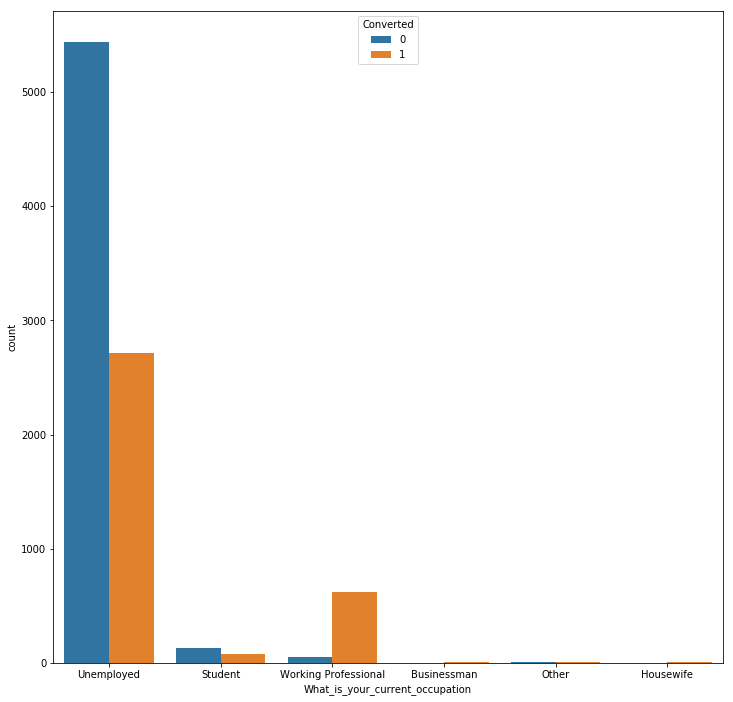

In [216]:
plt.figure(figsize=(12,12))
sns.countplot(leads['What_is_your_current_occupation'],hue=leads['Converted'])
plt.show()

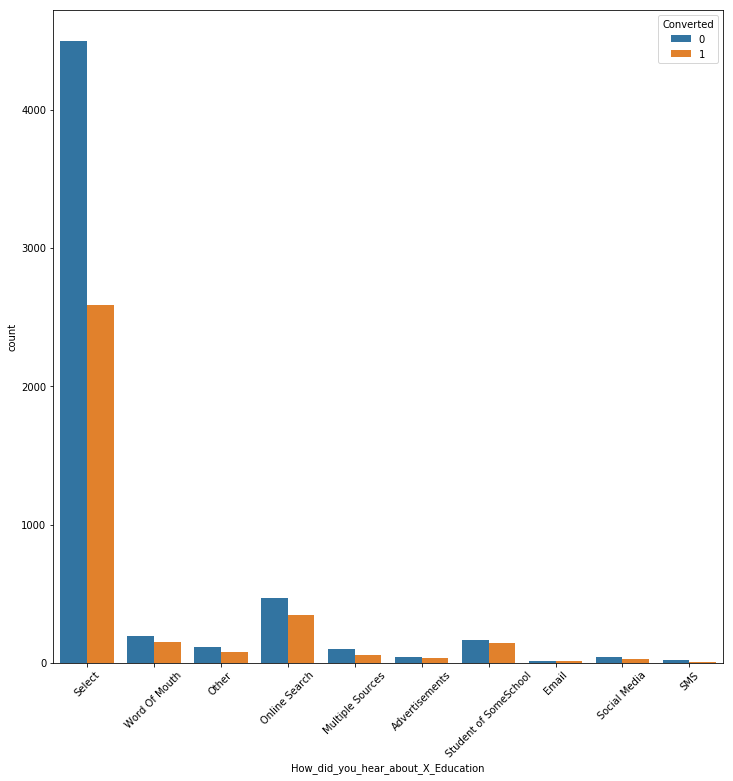

In [217]:
plt.figure(figsize=(12,12))
sns.countplot(leads['How_did_you_hear_about_X_Education'],hue=leads['Converted'])
plt.xticks(rotation=45)
plt.show()

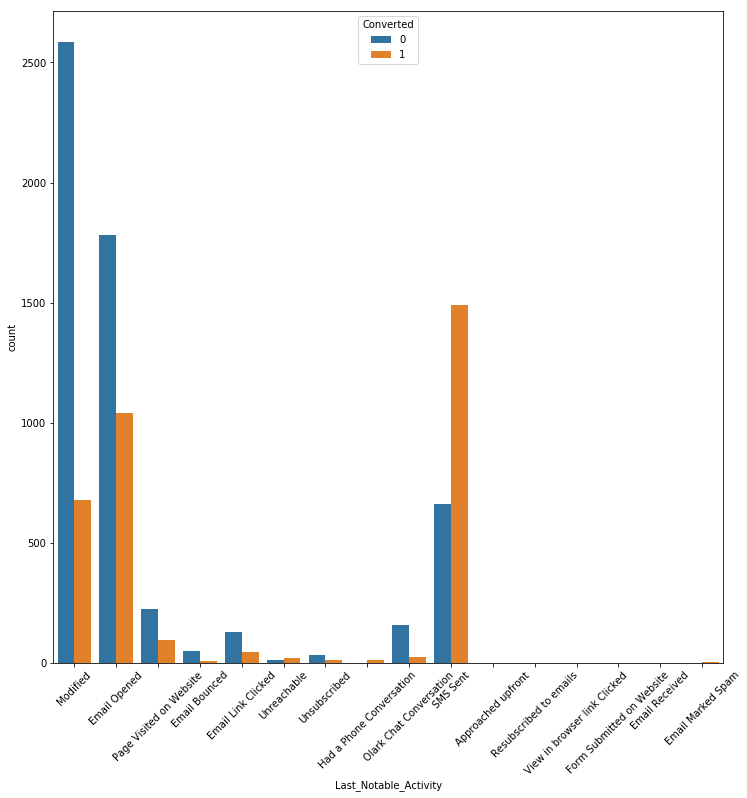

In [218]:
plt.figure(figsize=(12,12))
sns.countplot(leads['Last_Notable_Activity'],hue=leads['Converted'])
plt.xticks(rotation=45)
plt.show()

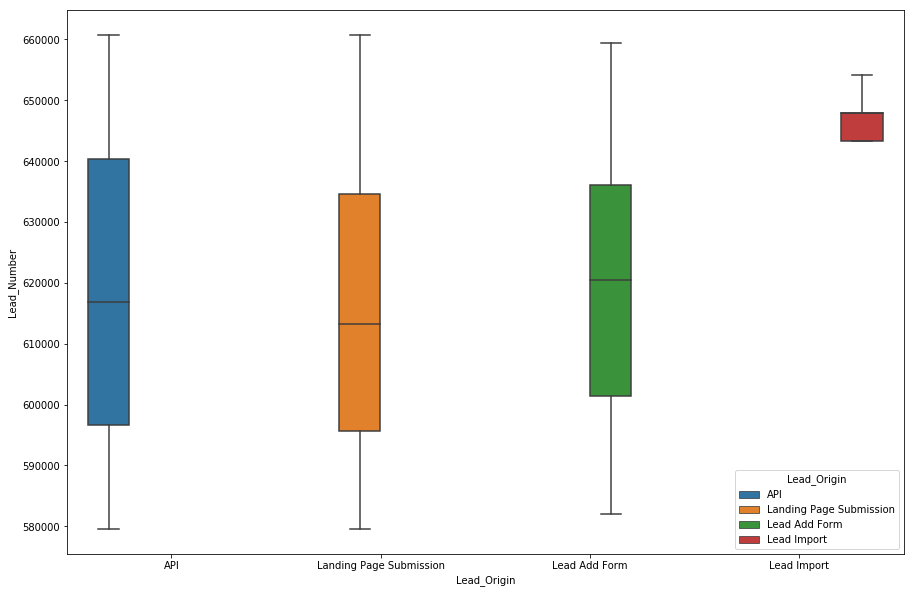

In [219]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'Lead_Origin', y = 'Lead_Number',hue = 'Lead_Origin', data = leads)

In [220]:
leads.columns

Index(['Lead_Number', 'Lead_Origin', 'Lead_Source', 'Do_Not_Email',
       'Do_Not_Call', 'Converted', 'TotalVisits',
       'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit', 'Last_Activity',
       'Specialization', 'How_did_you_hear_about_X_Education',
       'What_is_your_current_occupation',
       'What_matters_most_to_you_in_choosing_a_course', 'Search', 'Magazine',
       'Newspaper_Article', 'X_Education_Forums', 'Newspaper',
       'Digital_Advertisement', 'Through_Recommendations',
       'Receive_More_Updates_About_Our_Courses',
       'Update_me_on_Supply_Chain_Content', 'Get_updates_on_DM_Content',
       'Lead_Profile', 'City', 'I_agree_to_pay_the_amount_through_cheque',
       'A_free_copy_of_Mastering_The_Interview', 'Last_Notable_Activity'],
      dtype='object')

In [221]:
leads['What_matters_most_to_you_in_choosing_a_course'].unique()

array(['Better Career Prospects', 'Flexibility & Convenience', 'Other'],
      dtype=object)

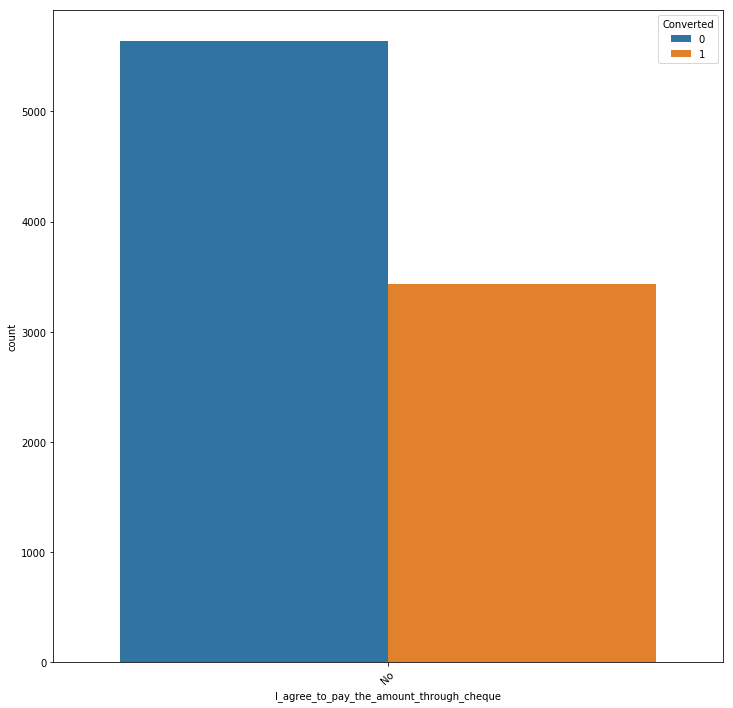

In [222]:
plt.figure(figsize=(12,12))
sns.countplot(leads['I_agree_to_pay_the_amount_through_cheque'],hue=leads['Converted'])
plt.xticks(rotation=45)
plt.show()

In [223]:
leads['I_agree_to_pay_the_amount_through_cheque'].unique()

array(['No'], dtype=object)

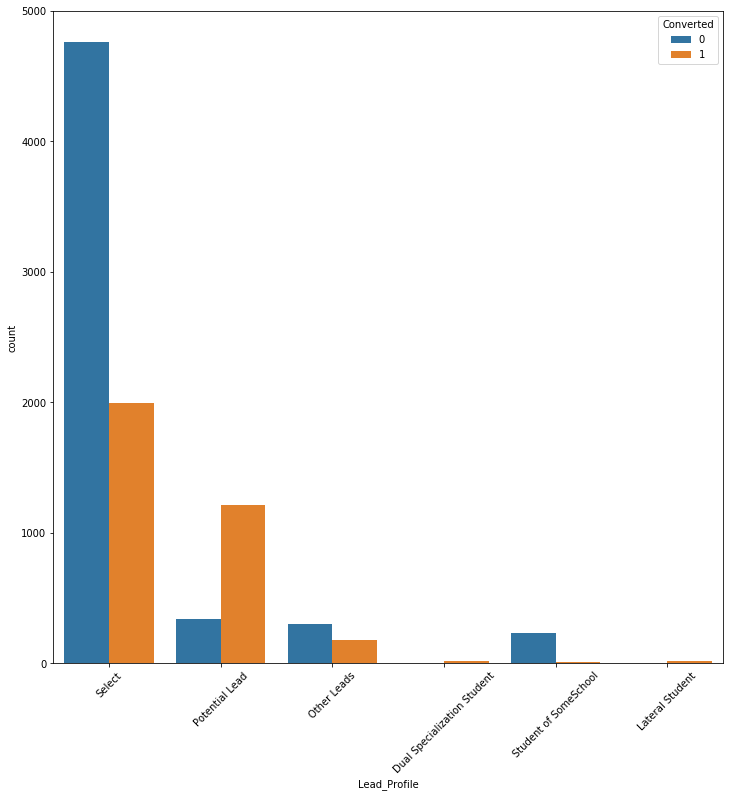

In [224]:
plt.figure(figsize=(12,12))
sns.countplot(leads['Lead_Profile'],hue=leads['Converted'])
plt.xticks(rotation=45)
plt.show()

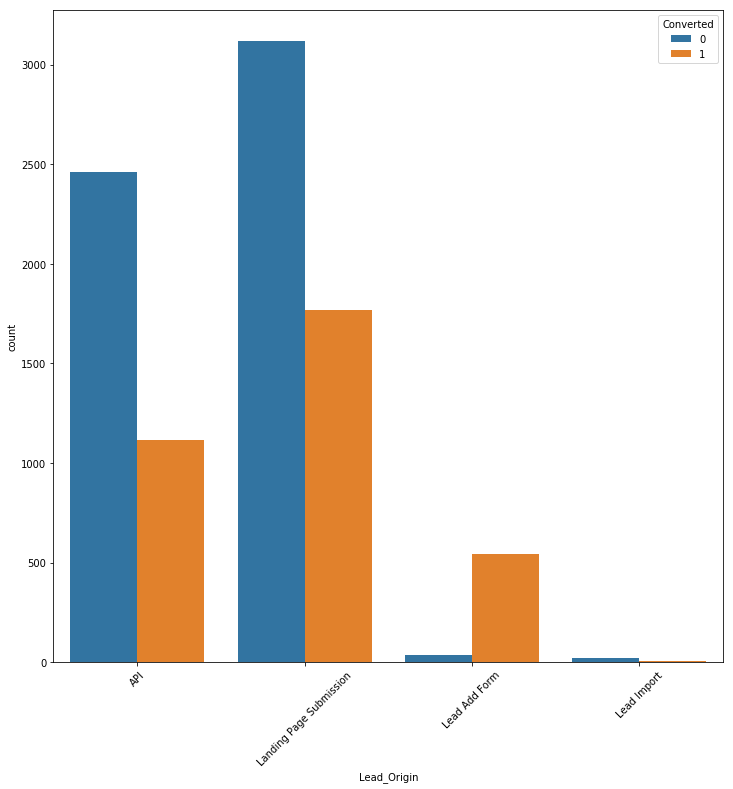

In [225]:
plt.figure(figsize=(12,12))
sns.countplot(leads['Lead_Origin'],hue=leads['Converted'])
plt.xticks(rotation=45)
plt.show()

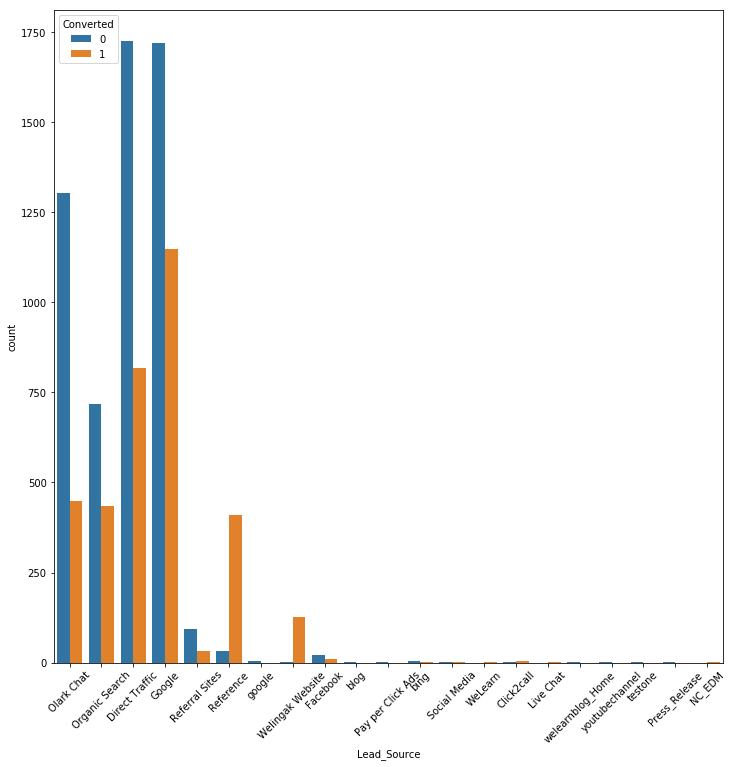

In [226]:
plt.figure(figsize=(12,12))
sns.countplot(leads['Lead_Source'],hue=leads['Converted'])
plt.xticks(rotation=45)
plt.show()

### The Country is India (very few people have bought from other countries)

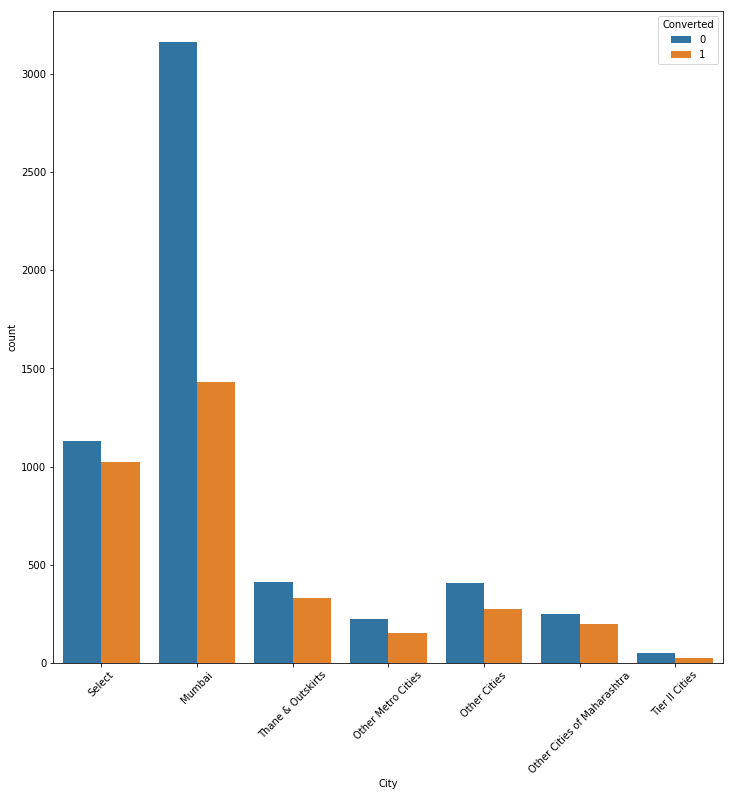

In [227]:
plt.figure(figsize=(12,12))
sns.countplot(leads['City'],hue=leads['Converted'])
plt.xticks(rotation=45)
plt.show()

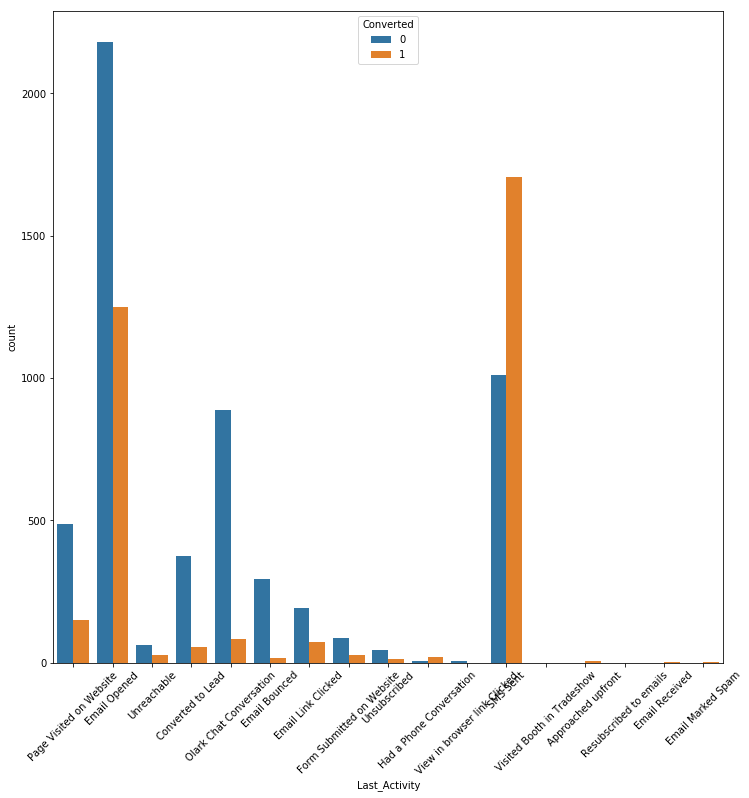

In [228]:
plt.figure(figsize=(12,12))
sns.countplot(leads['Last_Activity'],hue=leads['Converted'])
plt.xticks(rotation=45)
plt.show()

In [229]:
# Removing NaN TotalCharges rows

In [230]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 29 columns):
Lead_Number                                      9074 non-null int64
Lead_Origin                                      9074 non-null object
Lead_Source                                      9074 non-null object
Do_Not_Email                                     9074 non-null object
Do_Not_Call                                      9074 non-null object
Converted                                        9074 non-null int64
TotalVisits                                      9074 non-null float64
Total_Time_Spent_on_Website                      9074 non-null int64
Page_Views_Per_Visit                             9074 non-null float64
Last_Activity                                    9074 non-null object
Specialization                                   9074 non-null object
How_did_you_hear_about_X_Education               9074 non-null object
What_is_your_current_occupation                  9074 

In [231]:
leads.shape

(9074, 29)

In [232]:
leads.Converted.value_counts()/len(leads)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

#### Crosschecking & Comaprision with Excel sheet

In [233]:
leads.to_csv("Leads_Check1.csv",sep='\t', encoding='utf-8')

### The Converted is disturbuted in ratio of 60 to 40 which is OK and we can go ahead with our Classification

In [234]:
leads['Update_me_on_Supply_Chain_Content'].unique()

array(['No'], dtype=object)

In [235]:
leads['Get_updates_on_DM_Content'].unique()

array(['No'], dtype=object)

In [236]:
leads['Do_Not_Call'].unique()

array(['No', 'Yes'], dtype=object)

In [237]:
leads['Receive_More_Updates_About_Our_Courses'].unique()

array(['No'], dtype=object)

In [238]:
leads['Search'].unique()

array(['No', 'Yes'], dtype=object)

In [239]:
leads['Magazine'].unique()

array(['No'], dtype=object)

In [240]:
leads['X_Education_Forums'].unique()

array(['No', 'Yes'], dtype=object)

In [241]:
leads['Newspaper'].unique()

array(['No', 'Yes'], dtype=object)

In [242]:
leads['Newspaper_Article'].unique()

array(['No', 'Yes'], dtype=object)

In [243]:
leads['Digital_Advertisement'].unique()

array(['No', 'Yes'], dtype=object)

In [244]:
leads['Through_Recommendations'].unique()

array(['No', 'Yes'], dtype=object)

#### Dropping unimportant columns that have only "No" in them 

In [245]:
leads.drop(columns=['Magazine','Receive_More_Updates_About_Our_Courses','Get_updates_on_DM_Content','Update_me_on_Supply_Chain_Content'],axis=1,inplace=True)

In [246]:
leads.head()

Lead_Number              Lead_Origin     Lead_Source Do_Not_Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do_Not_Call  Converted  TotalVisits  Total_Time_Spent_on_Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page_Views_Per_Visit            Last_Activity           Specialization  \
0                   0.0  Page Visited on Website                   Select   
1                   2.5             Email Opened                   Select   
2                   2.0             Email Opened  Business Administration   
3                   1.0              Unreachable    Media and Advertising   
4                   1.0        Converted to Lead                   Select   

  How_did_you_hear_about_X_Education What_is_your_current_occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

  What_matters_most_to_you_in_choosing_a_course Search Newspaper_Article  \
0                       Better Career Prospects     No                No   
1                       Better Career Prospects     No                No   
2                       Better Career Prospects     No                No   
3                       Better Career Prospects     No                No   
4                       Better Career Prospects     No                No   

  X_Education_Forums Newspaper Digital_Advertisement Through_Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

     Lead_Profile    City I_agree_to_pay_the_amount_through_cheque  \
0          Select  Select                                       No   
1          Select  Select                                       No   
2  Potential Lead  Mumbai                                       No   
3          Select  Mumbai                                       No   
4          Select  Mumbai                                       No   

  A_free_copy_of_Mastering_The_Interview Last_Notable_Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [247]:
leads.shape

(9074, 25)

In [248]:
leads['Do_Not_Email'].unique()

array(['No', 'Yes'], dtype=object)

In [249]:
leads['I_agree_to_pay_the_amount_through_cheque'].unique()

array(['No'], dtype=object)

In [250]:
leads.drop(columns='I_agree_to_pay_the_amount_through_cheque',axis=1,inplace=True)

In [251]:
leads

Lead_Number              Lead_Origin     Lead_Source Do_Not_Email  \
0          660737                      API      Olark Chat           No   
1          660728                      API  Organic Search           No   
2          660727  Landing Page Submission  Direct Traffic           No   
3          660719  Landing Page Submission  Direct Traffic           No   
4          660681  Landing Page Submission          Google           No   
5          660680                      API      Olark Chat           No   
6          660673  Landing Page Submission          Google           No   
7          660664                      API      Olark Chat           No   
8          660624  Landing Page Submission  Direct Traffic           No   
9          660616                      API          Google           No   
10         660608  Landing Page Submission  Organic Search           No   
11         660570  Landing Page Submission  Direct Traffic           No   
12         660562                      API  Organic Search           No   
13         660558  Landing Page Submission  Organic Search           No   
14         660553  Landing Page Submission  Direct Traffic          Yes   
15         660547                      API  Organic Search           No   
16         660540                      API      Olark Chat           No   
17         660534                      API  Referral Sites           No   
18         660522  Landing Page Submission          Google           No   
19         660509                      API  Organic Search           No   
20         660479  Landing Page Submission          Google           No   
21         660478                      API          Google           No   
22         660471  Landing Page Submission          Google           No   
23         660461  Landing Page Submission          Google           No   
24         660458                      API          Google           No   
25         660447  Landing Page Submission          Google           No   
26         660432  Landing Page Submission  Organic Search           No   
27         660424  Landing Page Submission          Google           No   
28         660423  Landing Page Submission  Direct Traffic           No   
29         660410                      API          Google           No   
...           ...                      ...             ...          ...   
9210       579833  Landing Page Submission  Direct Traffic           No   
9211       579832  Landing Page Submission  Direct Traffic           No   
9212       579830  Landing Page Submission          Google          Yes   
9213       579822  Landing Page Submission  Direct Traffic          Yes   
9214       579808                      API  Organic Search           No   
9215       579802  Landing Page Submission  Organic Search           No   
9216       579799  Landing Page Submission  Direct Traffic          Yes   
9217       579786                      API      Olark Chat           No   
9218       579784  Landing Page Submission          Google          Yes   
9219       579778  Landing Page Submission  Direct Traffic           No   
9220       579769  Landing Page Submission  Direct Traffic           No   
9221       579767  Landing Page Submission          Google           No   
9222       579764                      API          Google           No   
9223       579755                      API  Organic Search           No   
9224       579753  Landing Page Submission          Google           No   
9225       579744  Landing Page Submission  Direct Traffic          Yes   
9226       579735                      API      Olark Chat           No   
9227       579728  Landing Page Submission          Google           No   
9228       579717  Landing Page Submission          Google           No   
9229       579712  Landing Page Submission  Organic Search           No   
9230       579701  Landing Page Submission          Google           No   
9231       579697  Landing Page

In [252]:
leads['Lead_Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import'],
      dtype=object)

# Step 5 : Handling categorical variable (Dummification..!!)

In [253]:
from sklearn.preprocessing import LabelEncoder

In [254]:
l=LabelEncoder()

In [255]:
leads['Do_Not_Call']=l.fit_transform(leads['Do_Not_Call'])
leads['Do_Not_Email']=l.fit_transform(leads['Do_Not_Email'])
leads['A_free_copy_of_Mastering_The_Interview']=l.fit_transform(leads['A_free_copy_of_Mastering_The_Interview'])


In [256]:
leads.head()

Lead_Number              Lead_Origin     Lead_Source  Do_Not_Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Do_Not_Call  Converted  TotalVisits  Total_Time_Spent_on_Website  \
0            0          0          0.0                            0   
1            0          0          5.0                          674   
2            0          1          2.0                         1532   
3            0          0          1.0                          305   
4            0          1          2.0                         1428   

   Page_Views_Per_Visit            Last_Activity           Specialization  \
0                   0.0  Page Visited on Website                   Select   
1                   2.5             Email Opened                   Select   
2                   2.0             Email Opened  Business Administration   
3                   1.0              Unreachable    Media and Advertising   
4                   1.0        Converted to Lead                   Select   

  How_did_you_hear_about_X_Education What_is_your_current_occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

  What_matters_most_to_you_in_choosing_a_course Search Newspaper_Article  \
0                       Better Career Prospects     No                No   
1                       Better Career Prospects     No                No   
2                       Better Career Prospects     No                No   
3                       Better Career Prospects     No                No   
4                       Better Career Prospects     No                No   

  X_Education_Forums Newspaper Digital_Advertisement Through_Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

     Lead_Profile    City  A_free_copy_of_Mastering_The_Interview  \
0          Select  Select                                       0   
1          Select  Select                                       0   
2  Potential Lead  Mumbai                                       1   
3          Select  Mumbai                                       0   
4          Select  Mumbai                                       0   

  Last_Notable_Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [257]:
leads['Lead_Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead_Origin, dtype: int64

In [258]:
leads['Lead_Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
NC_EDM                  1
Pay per Click Ads       1
youtubechannel          1
testone                 1
blog                    1
welearnblog_Home        1
WeLearn                 1
Name: Lead_Source, dtype: int64

In [259]:
leads['Last_Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last_Activity, dtype: int64

In [260]:
leads['Last_Notable_Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last_Notable_Activity, dtype: int64

In [261]:
leads['Specialization'].value_counts()

Select                               3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [262]:
leads.columns

Index(['Lead_Number', 'Lead_Origin', 'Lead_Source', 'Do_Not_Email',
       'Do_Not_Call', 'Converted', 'TotalVisits',
       'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit', 'Last_Activity',
       'Specialization', 'How_did_you_hear_about_X_Education',
       'What_is_your_current_occupation',
       'What_matters_most_to_you_in_choosing_a_course', 'Search',
       'Newspaper_Article', 'X_Education_Forums', 'Newspaper',
       'Digital_Advertisement', 'Through_Recommendations', 'Lead_Profile',
       'City', 'A_free_copy_of_Mastering_The_Interview',
       'Last_Notable_Activity'],
      dtype='object')

In [263]:
leads['What_matters_most_to_you_in_choosing_a_course'].unique()

array(['Better Career Prospects', 'Flexibility & Convenience', 'Other'],
      dtype=object)

In [264]:
leads['Lead_Profile'].value_counts()

Select                         6757
Potential Lead                 1554
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead_Profile, dtype: int64

In [265]:
leads.head(5)

Lead_Number              Lead_Origin     Lead_Source  Do_Not_Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Do_Not_Call  Converted  TotalVisits  Total_Time_Spent_on_Website  \
0            0          0          0.0                            0   
1            0          0          5.0                          674   
2            0          1          2.0                         1532   
3            0          0          1.0                          305   
4            0          1          2.0                         1428   

   Page_Views_Per_Visit            Last_Activity           Specialization  \
0                   0.0  Page Visited on Website                   Select   
1                   2.5             Email Opened                   Select   
2                   2.0             Email Opened  Business Administration   
3                   1.0              Unreachable    Media and Advertising   
4                   1.0        Converted to Lead                   Select   

  How_did_you_hear_about_X_Education What_is_your_current_occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

  What_matters_most_to_you_in_choosing_a_course Search Newspaper_Article  \
0                       Better Career Prospects     No                No   
1                       Better Career Prospects     No                No   
2                       Better Career Prospects     No                No   
3                       Better Career Prospects     No                No   
4                       Better Career Prospects     No                No   

  X_Education_Forums Newspaper Digital_Advertisement Through_Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

     Lead_Profile    City  A_free_copy_of_Mastering_The_Interview  \
0          Select  Select                                       0   
1          Select  Select                                       0   
2  Potential Lead  Mumbai                                       1   
3          Select  Mumbai                                       0   
4          Select  Mumbai                                       0   

  Last_Notable_Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [267]:
leads=pd.get_dummies(leads,columns=['Lead_Origin','Lead_Source','Last_Activity','Specialization','How_did_you_hear_about_X_Education','What_is_your_current_occupation'
                              ,'City','Last_Notable_Activity'
                              ])

In [268]:
leads.head()

Lead_Number  Do_Not_Email  Do_Not_Call  Converted  TotalVisits  \
0       660737             0            0          0          0.0   
1       660728             0            0          0          5.0   
2       660727             0            0          1          2.0   
3       660719             0            0          0          1.0   
4       660681             0            0          1          2.0   

   Total_Time_Spent_on_Website  Page_Views_Per_Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

  What_matters_most_to_you_in_choosing_a_course Search Newspaper_Article  \
0                       Better Career Prospects     No                No   
1                       Better Career Prospects     No                No   
2                       Better Career Prospects     No                No   
3                       Better Career Prospects     No                No   
4                       Better Career Prospects     No                No   

  X_Education_Forums Newspaper Digital_Advertisement Through_Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

     Lead_Profile  A_free_copy_of_Mastering_The_Interview  Lead_Origin_API  \
0          Select                                       0                1   
1          Select                                       0                1   
2  Potential Lead                                       1                0   
3          Select                                       0                0   
4          Select                                       0                0   

   Lead_Origin_Landing Page Submission  Lead_Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead_Origin_Lead Import  Lead_Source_Click2call  \
0                        0                       0   
1                        0                       0   
2                        0                       0   
3                        0                       0   
4                        0                       0   

   Lead_Source_Direct Traffic  Lead_Source_Facebook  Lead_Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead_Source_Live Chat  Lead_Source_NC_EDM  Lead_Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead_Source_Organic Search  Lead_Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           

In [269]:
leads['Search']=l.fit_transform(leads['Search'])
leads['Newspaper_Article']=l.fit_transform(leads['Newspaper_Article'])
leads['Digital_Advertisement']=l.fit_transform(leads['Digital_Advertisement'])
leads['Through_Recommendations']=l.fit_transform(leads['Through_Recommendations'])

In [270]:
leads.head()

Lead_Number  Do_Not_Email  Do_Not_Call  Converted  TotalVisits  \
0       660737             0            0          0          0.0   
1       660728             0            0          0          5.0   
2       660727             0            0          1          2.0   
3       660719             0            0          0          1.0   
4       660681             0            0          1          2.0   

   Total_Time_Spent_on_Website  Page_Views_Per_Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

  What_matters_most_to_you_in_choosing_a_course  Search  Newspaper_Article  \
0                       Better Career Prospects       0                  0   
1                       Better Career Prospects       0                  0   
2                       Better Career Prospects       0                  0   
3                       Better Career Prospects       0                  0   
4                       Better Career Prospects       0                  0   

  X_Education_Forums Newspaper  Digital_Advertisement  \
0                 No        No                      0   
1                 No        No                      0   
2                 No        No                      0   
3                 No        No                      0   
4                 No        No                      0   

   Through_Recommendations    Lead_Profile  \
0                        0          Select   
1                        0          Select   
2                        0  Potential Lead   
3                        0          Select   
4                        0          Select   

   A_free_copy_of_Mastering_The_Interview  Lead_Origin_API  \
0                                       0                1   
1                                       0                1   
2                                       1                0   
3                                       0                0   
4                                       0                0   

   Lead_Origin_Landing Page Submission  Lead_Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead_Origin_Lead Import  Lead_Source_Click2call  \
0                        0                       0   
1                        0                       0   
2                        0                       0   
3                        0                       0   
4                        0                       0   

   Lead_Source_Direct Traffic  Lead_Source_Facebook  Lead_Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead_Source_Live Chat  Lead_Source_NC_EDM  Lead_Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead_Source_Organic Search  Lead_Source_Pay per Click Ads  \
0                           0                              0   
1                           1        

In [271]:
leads['What_matters_most_to_you_in_choosing_a_course'].unique()

array(['Better Career Prospects', 'Flexibility & Convenience', 'Other'],
      dtype=object)

In [272]:
leads.head()

Lead_Number  Do_Not_Email  Do_Not_Call  Converted  TotalVisits  \
0       660737             0            0          0          0.0   
1       660728             0            0          0          5.0   
2       660727             0            0          1          2.0   
3       660719             0            0          0          1.0   
4       660681             0            0          1          2.0   

   Total_Time_Spent_on_Website  Page_Views_Per_Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

  What_matters_most_to_you_in_choosing_a_course  Search  Newspaper_Article  \
0                       Better Career Prospects       0                  0   
1                       Better Career Prospects       0                  0   
2                       Better Career Prospects       0                  0   
3                       Better Career Prospects       0                  0   
4                       Better Career Prospects       0                  0   

  X_Education_Forums Newspaper  Digital_Advertisement  \
0                 No        No                      0   
1                 No        No                      0   
2                 No        No                      0   
3                 No        No                      0   
4                 No        No                      0   

   Through_Recommendations    Lead_Profile  \
0                        0          Select   
1                        0          Select   
2                        0  Potential Lead   
3                        0          Select   
4                        0          Select   

   A_free_copy_of_Mastering_The_Interview  Lead_Origin_API  \
0                                       0                1   
1                                       0                1   
2                                       1                0   
3                                       0                0   
4                                       0                0   

   Lead_Origin_Landing Page Submission  Lead_Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead_Origin_Lead Import  Lead_Source_Click2call  \
0                        0                       0   
1                        0                       0   
2                        0                       0   
3                        0                       0   
4                        0                       0   

   Lead_Source_Direct Traffic  Lead_Source_Facebook  Lead_Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead_Source_Live Chat  Lead_Source_NC_EDM  Lead_Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead_Source_Organic Search  Lead_Source_Pay per Click Ads  \
0                           0                              0   
1                           1        

In [273]:
leads.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 116 columns):
Lead_Number                                                 int64
Do_Not_Email                                                int64
Do_Not_Call                                                 int64
Converted                                                   int64
TotalVisits                                                 float64
Total_Time_Spent_on_Website                                 int64
Page_Views_Per_Visit                                        float64
What_matters_most_to_you_in_choosing_a_course               object
Search                                                      int64
Newspaper_Article                                           int64
X_Education_Forums                                          object
Newspaper                                                   object
Digital_Advertisement                                       int64
Through_Recommendations    

In [274]:
leads=pd.get_dummies(leads,columns=['Lead_Profile','What_matters_most_to_you_in_choosing_a_course'])

In [275]:
leads.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 123 columns):
Lead_Number                                                                int64
Do_Not_Email                                                               int64
Do_Not_Call                                                                int64
Converted                                                                  int64
TotalVisits                                                                float64
Total_Time_Spent_on_Website                                                int64
Page_Views_Per_Visit                                                       float64
Search                                                                     int64
Newspaper_Article                                                          int64
X_Education_Forums                                                         object
Newspaper                                                                  ob

In [276]:
leads.head(5)

Lead_Number  Do_Not_Email  Do_Not_Call  Converted  TotalVisits  \
0       660737             0            0          0          0.0   
1       660728             0            0          0          5.0   
2       660727             0            0          1          2.0   
3       660719             0            0          0          1.0   
4       660681             0            0          1          2.0   

   Total_Time_Spent_on_Website  Page_Views_Per_Visit  Search  \
0                            0                   0.0       0   
1                          674                   2.5       0   
2                         1532                   2.0       0   
3                          305                   1.0       0   
4                         1428                   1.0       0   

   Newspaper_Article X_Education_Forums Newspaper  Digital_Advertisement  \
0                  0                 No        No                      0   
1                  0                 No        No                      0   
2                  0                 No        No                      0   
3                  0                 No        No                      0   
4                  0                 No        No                      0   

   Through_Recommendations  A_free_copy_of_Mastering_The_Interview  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Lead_Origin_API  Lead_Origin_Landing Page Submission  \
0                1                                    0   
1                1                                    0   
2                0                                    1   
3                0                                    1   
4                0                                    1   

   Lead_Origin_Lead Add Form  Lead_Origin_Lead Import  Lead_Source_Click2call  \
0                          0                        0                       0   
1                          0                        0                       0   
2                          0                        0                       0   
3                          0                        0                       0   
4                          0                        0                       0   

   Lead_Source_Direct Traffic  Lead_Source_Facebook  Lead_Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead_Source_Live Chat  Lead_Source_NC_EDM  Lead_Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead_Source_Organic Search  Lead_Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead_Source_Press_Release  Lead_Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                     

In [277]:
leads['X_Education_Forums'].unique()

array(['No', 'Yes'], dtype=object)

In [278]:
leads['Newspaper'].unique()

array(['No', 'Yes'], dtype=object)

In [279]:
leads['X_Education_Forums']=l.fit_transform(leads['X_Education_Forums'])
leads['Newspaper']=l.fit_transform(leads['Newspaper'])

In [280]:
leads.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 123 columns):
Lead_Number                                                                int64
Do_Not_Email                                                               int64
Do_Not_Call                                                                int64
Converted                                                                  int64
TotalVisits                                                                float64
Total_Time_Spent_on_Website                                                int64
Page_Views_Per_Visit                                                       float64
Search                                                                     int64
Newspaper_Article                                                          int64
X_Education_Forums                                                         int64
Newspaper                                                                  int

In [281]:
leads.head()

Lead_Number  Do_Not_Email  Do_Not_Call  Converted  TotalVisits  \
0       660737             0            0          0          0.0   
1       660728             0            0          0          5.0   
2       660727             0            0          1          2.0   
3       660719             0            0          0          1.0   
4       660681             0            0          1          2.0   

   Total_Time_Spent_on_Website  Page_Views_Per_Visit  Search  \
0                            0                   0.0       0   
1                          674                   2.5       0   
2                         1532                   2.0       0   
3                          305                   1.0       0   
4                         1428                   1.0       0   

   Newspaper_Article  X_Education_Forums  Newspaper  Digital_Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through_Recommendations  A_free_copy_of_Mastering_The_Interview  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Lead_Origin_API  Lead_Origin_Landing Page Submission  \
0                1                                    0   
1                1                                    0   
2                0                                    1   
3                0                                    1   
4                0                                    1   

   Lead_Origin_Lead Add Form  Lead_Origin_Lead Import  Lead_Source_Click2call  \
0                          0                        0                       0   
1                          0                        0                       0   
2                          0                        0                       0   
3                          0                        0                       0   
4                          0                        0                       0   

   Lead_Source_Direct Traffic  Lead_Source_Facebook  Lead_Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead_Source_Live Chat  Lead_Source_NC_EDM  Lead_Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead_Source_Organic Search  Lead_Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead_Source_Press_Release  Lead_Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0         

In [282]:
leads.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 123 columns):
Lead_Number                                                                int64
Do_Not_Email                                                               int64
Do_Not_Call                                                                int64
Converted                                                                  int64
TotalVisits                                                                float64
Total_Time_Spent_on_Website                                                int64
Page_Views_Per_Visit                                                       float64
Search                                                                     int64
Newspaper_Article                                                          int64
X_Education_Forums                                                         int64
Newspaper                                                                  int

In [283]:
leads.columns

Index(['Lead_Number', 'Do_Not_Email', 'Do_Not_Call', 'Converted',
       'TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit',
       'Search', 'Newspaper_Article', 'X_Education_Forums',
       ...
       'Last_Notable_Activity_View in browser link Clicked',
       'Lead_Profile_Dual Specialization Student',
       'Lead_Profile_Lateral Student', 'Lead_Profile_Other Leads',
       'Lead_Profile_Potential Lead', 'Lead_Profile_Select',
       'Lead_Profile_Student of SomeSchool',
       'What_matters_most_to_you_in_choosing_a_course_Better Career Prospects',
       'What_matters_most_to_you_in_choosing_a_course_Flexibility & Convenience',
       'What_matters_most_to_you_in_choosing_a_course_Other'],
      dtype='object', length=123)

In [284]:
leads.head()

Lead_Number  Do_Not_Email  Do_Not_Call  Converted  TotalVisits  \
0       660737             0            0          0          0.0   
1       660728             0            0          0          5.0   
2       660727             0            0          1          2.0   
3       660719             0            0          0          1.0   
4       660681             0            0          1          2.0   

   Total_Time_Spent_on_Website  Page_Views_Per_Visit  Search  \
0                            0                   0.0       0   
1                          674                   2.5       0   
2                         1532                   2.0       0   
3                          305                   1.0       0   
4                         1428                   1.0       0   

   Newspaper_Article  X_Education_Forums  Newspaper  Digital_Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through_Recommendations  A_free_copy_of_Mastering_The_Interview  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Lead_Origin_API  Lead_Origin_Landing Page Submission  \
0                1                                    0   
1                1                                    0   
2                0                                    1   
3                0                                    1   
4                0                                    1   

   Lead_Origin_Lead Add Form  Lead_Origin_Lead Import  Lead_Source_Click2call  \
0                          0                        0                       0   
1                          0                        0                       0   
2                          0                        0                       0   
3                          0                        0                       0   
4                          0                        0                       0   

   Lead_Source_Direct Traffic  Lead_Source_Facebook  Lead_Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead_Source_Live Chat  Lead_Source_NC_EDM  Lead_Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead_Source_Organic Search  Lead_Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead_Source_Press_Release  Lead_Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0         

In [285]:
leads.drop(columns=['Lead_Profile_Select'
                 ,'Lead_Origin_Lead Add Form','Lead_Source_WeLearn','Last_Activity_Visited Booth in Tradeshow'
                 ,'Specialization_Services Excellence','How_did_you_hear_about_X_Education_Word Of Mouth'
                 ,'What_is_your_current_occupation_Housewife'
                 ,'City_Select'
                ,'Last_Notable_Activity_Approached upfront','What_matters_most_to_you_in_choosing_a_course_Other'],axis=1,inplace=True)

In [286]:
leads.head()

Lead_Number  Do_Not_Email  Do_Not_Call  Converted  TotalVisits  \
0       660737             0            0          0          0.0   
1       660728             0            0          0          5.0   
2       660727             0            0          1          2.0   
3       660719             0            0          0          1.0   
4       660681             0            0          1          2.0   

   Total_Time_Spent_on_Website  Page_Views_Per_Visit  Search  \
0                            0                   0.0       0   
1                          674                   2.5       0   
2                         1532                   2.0       0   
3                          305                   1.0       0   
4                         1428                   1.0       0   

   Newspaper_Article  X_Education_Forums  Newspaper  Digital_Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through_Recommendations  A_free_copy_of_Mastering_The_Interview  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Lead_Origin_API  Lead_Origin_Landing Page Submission  \
0                1                                    0   
1                1                                    0   
2                0                                    1   
3                0                                    1   
4                0                                    1   

   Lead_Origin_Lead Import  Lead_Source_Click2call  \
0                        0                       0   
1                        0                       0   
2                        0                       0   
3                        0                       0   
4                        0                       0   

   Lead_Source_Direct Traffic  Lead_Source_Facebook  Lead_Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead_Source_Live Chat  Lead_Source_NC_EDM  Lead_Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead_Source_Organic Search  Lead_Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead_Source_Press_Release  Lead_Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead_Source_Referral Sites  Le

In [287]:
leads.drop(columns='Lead_Number',axis=1,inplace=True)

In [288]:
leads['Do_Not_Call'].unique()

array([0, 1], dtype=int64)

In [289]:
leads.shape

(9074, 112)

#### Crosschecking & Comaprision with Excel sheet after Dummy creation

In [290]:
leads.to_csv("Leads_Dummified_Check2.csv",sep='\t', encoding='utf-8')

### Scaling the data

In [291]:
from sklearn.preprocessing import StandardScaler

In [292]:
s=StandardScaler()

leads['Total Time Spent on Website']=s.fit_transform(leads['Total Time Spent on Website'].values.reshape(-1,1))
leads['Page Views Per Visit']=s.fit_transform(leads['Page Views Per Visit'].values.reshape(-1,1))
leads['Asymmetrique Activity Score']=s.fit_transform(leads['Asymmetrique Activity Score'].values.reshape(-1,1))
leads['Asymmetrique Profile Score']=s.fit_transform(leads['Asymmetrique Profile Score'].values.reshape(-1,1))


leads['TotalVisits']=s.fit_transform(leads['TotalVisits'].values.reshape(-1,1))

In [293]:
leads.head()

Do_Not_Email  Do_Not_Call  Converted  TotalVisits  \
0             0            0          0          0.0   
1             0            0          0          5.0   
2             0            0          1          2.0   
3             0            0          0          1.0   
4             0            0          1          2.0   

   Total_Time_Spent_on_Website  Page_Views_Per_Visit  Search  \
0                            0                   0.0       0   
1                          674                   2.5       0   
2                         1532                   2.0       0   
3                          305                   1.0       0   
4                         1428                   1.0       0   

   Newspaper_Article  X_Education_Forums  Newspaper  Digital_Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through_Recommendations  A_free_copy_of_Mastering_The_Interview  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Lead_Origin_API  Lead_Origin_Landing Page Submission  \
0                1                                    0   
1                1                                    0   
2                0                                    1   
3                0                                    1   
4                0                                    1   

   Lead_Origin_Lead Import  Lead_Source_Click2call  \
0                        0                       0   
1                        0                       0   
2                        0                       0   
3                        0                       0   
4                        0                       0   

   Lead_Source_Direct Traffic  Lead_Source_Facebook  Lead_Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead_Source_Live Chat  Lead_Source_NC_EDM  Lead_Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead_Source_Organic Search  Lead_Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead_Source_Press_Release  Lead_Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead_Source_Referral Sites  Lead_Source_Social Media  \
0                           0                       

In [294]:
# now distirbuting the data and looking for trainx,trainy,testx,testy

In [295]:
leads2=leads.copy()

In [296]:
y=leads2.pop('Converted')
x=leads2

# Step 6 : Splitting the Data into Training and Testing Sets

In [297]:
from sklearn.model_selection import train_test_split

In [298]:
trainx,testx,trainy,testy=train_test_split(x,y,test_size=.30,random_state=42)

In [299]:
trainx.head(1)


Do_Not_Email  Do_Not_Call  TotalVisits  Total_Time_Spent_on_Website  \
1943             0            0          2.0                         1419   

      Page_Views_Per_Visit  Search  Newspaper_Article  X_Education_Forums  \
1943                   2.0       0                  0                   0   

      Newspaper  Digital_Advertisement  Through_Recommendations  \
1943          0                      0                        0   

      A_free_copy_of_Mastering_The_Interview  Lead_Origin_API  \
1943                                       1                0   

      Lead_Origin_Landing Page Submission  Lead_Origin_Lead Import  \
1943                                    1                        0   

      Lead_Source_Click2call  Lead_Source_Direct Traffic  \
1943                       0                           1   

      Lead_Source_Facebook  Lead_Source_Google  Lead_Source_Live Chat  \
1943                     0                   0                      0   

      Lead_Source_NC_EDM  Lead_Source_Olark Chat  Lead_Source_Organic Search  \
1943                   0                       0                           0   

      Lead_Source_Pay per Click Ads  Lead_Source_Press_Release  \
1943                              0                          0   

      Lead_Source_Reference  Lead_Source_Referral Sites  \
1943                      0                           0   

      Lead_Source_Social Media  Lead_Source_Welingak Website  \
1943                         0                             0   

      Lead_Source_bing  Lead_Source_blog  Lead_Source_google  \
1943                 0                 0                   0   

      Lead_Source_testone  Lead_Source_welearnblog_Home  \
1943                    0                             0   

      Lead_Source_youtubechannel  Last_Activity_Approached upfront  \
1943                           0                                 0   

      Last_Activity_Converted to Lead  Last_Activity_Email Bounced  \
1943                                0                            0   

      Last_Activity_Email Link Clicked  Last_Activity_Email Marked Spam  \
1943                                 0                                0   

      Last_Activity_Email Opened  Last_Activity_Email Received  \
1943                           1                             0   

      Last_Activity_Form Submitted on Website  \
1943                                        0   

      Last_Activity_Had a Phone Conversation  \
1943                                       0   

      Last_Activity_Olark Chat Conversation  \
1943                                      0   

      Last_Activity_Page Visited on Website  \
1943                                      0   

      Last_Activity_Resubscribed to emails  Last_Activity_SMS Sent  \
1943                                     0                       0   

      Last_Activity_Unreachable  Last_Activity_Unsubscribed  \
1943                          0                           0   

      Last_Activity_View in browser link Clicked  \
1943                                           0   

      Specialization_Banking, Investment And Insurance  \
1943                                                 0   

      Specialization_Business Administration  Specialization_E-Business  \
1943                                       0                          0   

      Specialization_E-COMMERCE  Specialization_Finance Management  \
1943                          0                                  0   

      Specialization_Healthcare Management  \
1943                                     0   

      Specialization_Hospitality Management  \
1943                                      0   

      Specialization_Human Resource Management  \
1943                                         0   

      Specialization_IT Projects Management  \
1943                                      0   

      Specialization_International Business  \
1943                                      0   

      Specializati

In [300]:
trainx['Total_Time_Spent_on_Website']=s.fit_transform(trainx['Total_Time_Spent_on_Website'].values.reshape(-1,1))
trainx['Page_Views_Per_Visit']=s.fit_transform(trainx['Page_Views_Per_Visit'].values.reshape(-1,1))



trainx['TotalVisits']=s.fit_transform(trainx['TotalVisits'].values.reshape(-1,1))

# Step 7: Building our model
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [301]:
from sklearn.linear_model import LogisticRegression

In [302]:
from sklearn.feature_selection import RFE

In [303]:
regression=LogisticRegression()

In [304]:
regressionfinal=regression.fit(trainx,trainy)

In [305]:
rfe=RFE(regressionfinal,n_features_to_select=16)

In [306]:
finalrfe=rfe.fit(trainx,trainy)

In [307]:
list(zip(x.columns,finalrfe.ranking_,finalrfe.support_))

[('Do_Not_Email', 1, True),
 ('Do_Not_Call', 40, False),
 ('TotalVisits', 57, False),
 ('Total_Time_Spent_on_Website', 2, False),
 ('Page_Views_Per_Visit', 62, False),
 ('Search', 55, False),
 ('Newspaper_Article', 24, False),
 ('X_Education_Forums', 60, False),
 ('Newspaper', 13, False),
 ('Digital_Advertisement', 20, False),
 ('Through_Recommendations', 50, False),
 ('A_free_copy_of_Mastering_The_Interview', 87, False),
 ('Lead_Origin_API', 5, False),
 ('Lead_Origin_Landing Page Submission', 4, False),
 ('Lead_Origin_Lead Import', 42, False),
 ('Lead_Source_Click2call', 28, False),
 ('Lead_Source_Direct Traffic', 29, False),
 ('Lead_Source_Facebook', 69, False),
 ('Lead_Source_Google', 32, False),
 ('Lead_Source_Live Chat', 45, False),
 ('Lead_Source_NC_EDM', 14, False),
 ('Lead_Source_Olark Chat', 6, False),
 ('Lead_Source_Organic Search', 31, False),
 ('Lead_Source_Pay per Click Ads', 74, False),
 ('Lead_Source_Press_Release', 96, False),
 ('Lead_Source_Reference', 1, True),
 ('Lea


These are all ranks 1 











""" 'Lead Profile_Select','Lead Quality_Worst','Lead Quality_Might be','Tags_wrong number given','Tags_switched off',
'Tags_Will revert after reading the email',
'Tags_Ringing','Tags_Lost to EINS','Tags_Lateral student','Tags_Closed by Horizzon',
'Tags_Busy','Tags_Already a student','Last Notable Activity_SMS Sent'
'City_Select','What is your current occupation_Working Professional','Lead Source_Welingak Website' """

In [309]:
newdataframe=pd.DataFrame({'columns':x.columns,'support':finalrfe.support_})

In [310]:
newdataframe.head()

columns  support
0                 Do_Not_Email     True
1                  Do_Not_Call    False
2                  TotalVisits    False
3  Total_Time_Spent_on_Website    False
4         Page_Views_Per_Visit    False

In [311]:
trainx.head(1)

Do_Not_Email  Do_Not_Call  TotalVisits  Total_Time_Spent_on_Website  \
1943             0            0    -0.304688                      1.70438   

      Page_Views_Per_Visit  Search  Newspaper_Article  X_Education_Forums  \
1943              -0.16901       0                  0                   0   

      Newspaper  Digital_Advertisement  Through_Recommendations  \
1943          0                      0                        0   

      A_free_copy_of_Mastering_The_Interview  Lead_Origin_API  \
1943                                       1                0   

      Lead_Origin_Landing Page Submission  Lead_Origin_Lead Import  \
1943                                    1                        0   

      Lead_Source_Click2call  Lead_Source_Direct Traffic  \
1943                       0                           1   

      Lead_Source_Facebook  Lead_Source_Google  Lead_Source_Live Chat  \
1943                     0                   0                      0   

      Lead_Source_NC_EDM  Lead_Source_Olark Chat  Lead_Source_Organic Search  \
1943                   0                       0                           0   

      Lead_Source_Pay per Click Ads  Lead_Source_Press_Release  \
1943                              0                          0   

      Lead_Source_Reference  Lead_Source_Referral Sites  \
1943                      0                           0   

      Lead_Source_Social Media  Lead_Source_Welingak Website  \
1943                         0                             0   

      Lead_Source_bing  Lead_Source_blog  Lead_Source_google  \
1943                 0                 0                   0   

      Lead_Source_testone  Lead_Source_welearnblog_Home  \
1943                    0                             0   

      Lead_Source_youtubechannel  Last_Activity_Approached upfront  \
1943                           0                                 0   

      Last_Activity_Converted to Lead  Last_Activity_Email Bounced  \
1943                                0                            0   

      Last_Activity_Email Link Clicked  Last_Activity_Email Marked Spam  \
1943                                 0                                0   

      Last_Activity_Email Opened  Last_Activity_Email Received  \
1943                           1                             0   

      Last_Activity_Form Submitted on Website  \
1943                                        0   

      Last_Activity_Had a Phone Conversation  \
1943                                       0   

      Last_Activity_Olark Chat Conversation  \
1943                                      0   

      Last_Activity_Page Visited on Website  \
1943                                      0   

      Last_Activity_Resubscribed to emails  Last_Activity_SMS Sent  \
1943                                     0                       0   

      Last_Activity_Unreachable  Last_Activity_Unsubscribed  \
1943                          0                           0   

      Last_Activity_View in browser link Clicked  \
1943                                           0   

      Specialization_Banking, Investment And Insurance  \
1943                                                 0   

      Specialization_Business Administration  Specialization_E-Business  \
1943                                       0                          0   

      Specialization_E-COMMERCE  Specialization_Finance Management  \
1943                          0                                  0   

      Specialization_Healthcare Management  \
1943                                     0   

      Specialization_Hospitality Management  \
1943                                      0   

      Specialization_Human Resource Management  \
1943                                         0   

      Specialization_IT Projects Management  \
1943                                      0   

      Specialization_International Business  \
1943                                      0   

      Specializati

## Model # 1

In [313]:
trainx=trainx[['Lead_Profile_Student of SomeSchool','Lead_Profile_Potential Lead',
               'Lead_Profile_Dual Specialization Student',
'Lead_Profile_Lateral Student',
'Last_Notable_Activity_Had a Phone Conversation','Last_Notable_Activity_Email Bounced',
'Last_Notable_Activity_SMS Sent','Last_Notable_Activity_Unreachable','Do_Not_Email','Lead_Source_Reference',
'Last_Activity_Approached upfront',
'Last_Activity_Converted to Lead',
'Last_Activity_Email Bounced',
'What_is_your_current_occupation_Working Professional',
'What_is_your_current_occupation_Unemployed',
'Lead_Source_Welingak Website']]

import statsmodels.api as sm 

newx=sm.add_constant(trainx)

logisticmodel=sm.GLM(trainy,newx,family=sm.families.Binomial())

finallogisticmodel=logisticmodel.fit()

print(finallogisticmodel.summary())

from statsmodels.stats.outliers_influence import variance_inflation_factor



vif = pd.DataFrame()
vif['Features'] = trainx.columns
vif['VIF'] = [variance_inflation_factor(trainx.values, i) for i in range(trainx.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2901.2
Date:                Sun, 03 Mar 2019   Deviance:                       5802.3
Time:                        23:26:37   Pearson chi2:                 6.59e+03
No. Iterations:                    22   Covariance Type:             nonrobust
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                          

## Model # 2

##### Last Activity Approach upfront

In [314]:
trainx.head()

Lead_Profile_Student of SomeSchool  Lead_Profile_Potential Lead  \
1943                                   0                            0   
456                                    0                            0   
6547                                   0                            0   
8836                                   0                            1   
6529                                   0                            1   

      Lead_Profile_Dual Specialization Student  Lead_Profile_Lateral Student  \
1943                                         0                             0   
456                                          0                             0   
6547                                         0                             0   
8836                                         0                             0   
6529                                         0                             0   

      Last_Notable_Activity_Had a Phone Conversation  \
1943                                               0   
456                                                0   
6547                                               0   
8836                                               0   
6529                                               0   

      Last_Notable_Activity_Email Bounced  Last_Notable_Activity_SMS Sent  \
1943                                    0                               0   
456                                     0                               0   
6547                                    0                               1   
8836                                    0                               0   
6529                                    0                               1   

      Last_Notable_Activity_Unreachable  Do_Not_Email  Lead_Source_Reference  \
1943                                  0             0                      0   
456                                   0             0                      0   
6547                                  0             0                      0   
8836                                  0             0                      0   
6529                                  0             0                      0   

      Last_Activity_Approached upfront  Last_Activity_Converted to Lead  \
1943                                 0                                0   
456                                  0                                0   
6547                                 0                                0   
8836                                 0                                0   
6529                                 0                                0   

      Last_Activity_Email Bounced  \
1943                            0   
456                             0   
6547                            0   
8836                            0   
6529                            0   

      What_is_your_current_occupation_Working Professional  \
1943                                                  0      
456                                                   0      
6547                                                  0      
8836                                                  0      
6529                                                  1      

      What_is_your_current_occupation_Unemployed  Lead_Source_Welingak Website  
1943                                           1                             0  
456                                            1                             0  
6547                                           1                             0  
8836                                           1                             0  
6529                                           0                             0

In [316]:
trainx=trainx[['Lead_Profile_Student of SomeSchool','Lead_Profile_Potential Lead',
               'Lead_Profile_Dual Specialization Student',
'Lead_Profile_Lateral Student',
'Last_Notable_Activity_Had a Phone Conversation','Last_Notable_Activity_Email Bounced',
'Last_Notable_Activity_SMS Sent','Last_Notable_Activity_Unreachable','Do_Not_Email','Lead_Source_Reference',

'Last_Activity_Converted to Lead',
'Last_Activity_Email Bounced',
'What_is_your_current_occupation_Working Professional',
'What_is_your_current_occupation_Unemployed',
'Lead_Source_Welingak Website']]

import statsmodels.api as sm 

newx=sm.add_constant(trainx)

logisticmodel=sm.GLM(trainy,newx,family=sm.families.Binomial())

finallogisticmodel=logisticmodel.fit()

print(finallogisticmodel.summary())

from statsmodels.stats.outliers_influence import variance_inflation_factor



vif = pd.DataFrame()
vif['Features'] = trainx.columns
vif['VIF'] = [variance_inflation_factor(trainx.values, i) for i in range(trainx.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2906.1
Date:                Sun, 03 Mar 2019   Deviance:                       5812.2
Time:                        23:26:55   Pearson chi2:                 6.59e+03
No. Iterations:                    22   Covariance Type:             nonrobust
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                          

## Model # 3

 #### LEAD PROFILE LATERAL STUDENT

In [317]:
trainx.head()

Lead_Profile_Student of SomeSchool  Lead_Profile_Potential Lead  \
1943                                   0                            0   
456                                    0                            0   
6547                                   0                            0   
8836                                   0                            1   
6529                                   0                            1   

      Lead_Profile_Dual Specialization Student  Lead_Profile_Lateral Student  \
1943                                         0                             0   
456                                          0                             0   
6547                                         0                             0   
8836                                         0                             0   
6529                                         0                             0   

      Last_Notable_Activity_Had a Phone Conversation  \
1943                                               0   
456                                                0   
6547                                               0   
8836                                               0   
6529                                               0   

      Last_Notable_Activity_Email Bounced  Last_Notable_Activity_SMS Sent  \
1943                                    0                               0   
456                                     0                               0   
6547                                    0                               1   
8836                                    0                               0   
6529                                    0                               1   

      Last_Notable_Activity_Unreachable  Do_Not_Email  Lead_Source_Reference  \
1943                                  0             0                      0   
456                                   0             0                      0   
6547                                  0             0                      0   
8836                                  0             0                      0   
6529                                  0             0                      0   

      Last_Activity_Converted to Lead  Last_Activity_Email Bounced  \
1943                                0                            0   
456                                 0                            0   
6547                                0                            0   
8836                                0                            0   
6529                                0                            0   

      What_is_your_current_occupation_Working Professional  \
1943                                                  0      
456                                                   0      
6547                                                  0      
8836                                                  0      
6529                                                  1      

      What_is_your_current_occupation_Unemployed  Lead_Source_Welingak Website  
1943                                           1                             0  
456                                            1                             0  
6547                                           1                             0  
8836                                           1                             0  
6529                                           0                             0

In [318]:
trainx=trainx[['Lead_Profile_Student of SomeSchool','Lead_Profile_Potential Lead',
               'Lead_Profile_Dual Specialization Student',

'Last_Notable_Activity_Had a Phone Conversation','Last_Notable_Activity_Email Bounced',
'Last_Notable_Activity_SMS Sent','Last_Notable_Activity_Unreachable','Do_Not_Email','Lead_Source_Reference',

'Last_Activity_Converted to Lead',
'Last_Activity_Email Bounced',
'What_is_your_current_occupation_Working Professional',
'What_is_your_current_occupation_Unemployed',
'Lead_Source_Welingak Website']]

import statsmodels.api as sm 

newx=sm.add_constant(trainx)

logisticmodel=sm.GLM(trainy,newx,family=sm.families.Binomial())

finallogisticmodel=logisticmodel.fit()

print(finallogisticmodel.summary())

from statsmodels.stats.outliers_influence import variance_inflation_factor



vif = pd.DataFrame()
vif['Features'] = trainx.columns
vif['VIF'] = [variance_inflation_factor(trainx.values, i) for i in range(trainx.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2918.6
Date:                Sun, 03 Mar 2019   Deviance:                       5837.1
Time:                        23:27:08   Pearson chi2:                 6.61e+03
No. Iterations:                    21   Covariance Type:             nonrobust
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                          

## Model # 4

#### Removing Lead profile Dual Specilisation

In [319]:
trainx.head()

Lead_Profile_Student of SomeSchool  Lead_Profile_Potential Lead  \
1943                                   0                            0   
456                                    0                            0   
6547                                   0                            0   
8836                                   0                            1   
6529                                   0                            1   

      Lead_Profile_Dual Specialization Student  \
1943                                         0   
456                                          0   
6547                                         0   
8836                                         0   
6529                                         0   

      Last_Notable_Activity_Had a Phone Conversation  \
1943                                               0   
456                                                0   
6547                                               0   
8836                                               0   
6529                                               0   

      Last_Notable_Activity_Email Bounced  Last_Notable_Activity_SMS Sent  \
1943                                    0                               0   
456                                     0                               0   
6547                                    0                               1   
8836                                    0                               0   
6529                                    0                               1   

      Last_Notable_Activity_Unreachable  Do_Not_Email  Lead_Source_Reference  \
1943                                  0             0                      0   
456                                   0             0                      0   
6547                                  0             0                      0   
8836                                  0             0                      0   
6529                                  0             0                      0   

      Last_Activity_Converted to Lead  Last_Activity_Email Bounced  \
1943                                0                            0   
456                                 0                            0   
6547                                0                            0   
8836                                0                            0   
6529                                0                            0   

      What_is_your_current_occupation_Working Professional  \
1943                                                  0      
456                                                   0      
6547                                                  0      
8836                                                  0      
6529                                                  1      

      What_is_your_current_occupation_Unemployed  Lead_Source_Welingak Website  
1943                                           1                             0  
456                                            1                             0  
6547                                           1                             0  
8836                                           1                             0  
6529                                           0                             0

In [320]:
trainx=trainx[['Lead_Profile_Student of SomeSchool','Lead_Profile_Potential Lead',
               

'Last_Notable_Activity_Had a Phone Conversation','Last_Notable_Activity_Email Bounced',
'Last_Notable_Activity_SMS Sent','Last_Notable_Activity_Unreachable','Do_Not_Email','Lead_Source_Reference',

'Last_Activity_Converted to Lead',
'Last_Activity_Email Bounced',
'What_is_your_current_occupation_Working Professional',
'What_is_your_current_occupation_Unemployed',
'Lead_Source_Welingak Website']]

import statsmodels.api as sm 

newx=sm.add_constant(trainx)

logisticmodel=sm.GLM(trainy,newx,family=sm.families.Binomial())

finallogisticmodel=logisticmodel.fit()

print(finallogisticmodel.summary())

from statsmodels.stats.outliers_influence import variance_inflation_factor



vif = pd.DataFrame()
vif['Features'] = trainx.columns
vif['VIF'] = [variance_inflation_factor(trainx.values, i) for i in range(trainx.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2927.5
Date:                Sun, 03 Mar 2019   Deviance:                       5855.1
Time:                        23:27:20   Pearson chi2:                 6.63e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                          

## Final Model Completed

#### Now this is our final model from here we have to select the Probabilities cutoffs and procedd ahead

In [321]:
trainx.head()

Lead_Profile_Student of SomeSchool  Lead_Profile_Potential Lead  \
1943                                   0                            0   
456                                    0                            0   
6547                                   0                            0   
8836                                   0                            1   
6529                                   0                            1   

      Last_Notable_Activity_Had a Phone Conversation  \
1943                                               0   
456                                                0   
6547                                               0   
8836                                               0   
6529                                               0   

      Last_Notable_Activity_Email Bounced  Last_Notable_Activity_SMS Sent  \
1943                                    0                               0   
456                                     0                               0   
6547                                    0                               1   
8836                                    0                               0   
6529                                    0                               1   

      Last_Notable_Activity_Unreachable  Do_Not_Email  Lead_Source_Reference  \
1943                                  0             0                      0   
456                                   0             0                      0   
6547                                  0             0                      0   
8836                                  0             0                      0   
6529                                  0             0                      0   

      Last_Activity_Converted to Lead  Last_Activity_Email Bounced  \
1943                                0                            0   
456                                 0                            0   
6547                                0                            0   
8836                                0                            0   
6529                                0                            0   

      What_is_your_current_occupation_Working Professional  \
1943                                                  0      
456                                                   0      
6547                                                  0      
8836                                                  0      
6529                                                  1      

      What_is_your_current_occupation_Unemployed  Lead_Source_Welingak Website  
1943                                           1                             0  
456                                            1                             0  
6547                                           1                             0  
8836                                           1                             0  
6529                                           0                             0

#### Crosschecking the excel sheet

In [322]:
trainx.to_csv("Leads_trainx_Check3.csv",sep='\t', encoding='utf-8')

In [323]:
finallogisticmodel.predict(newx)

1943    0.195681
456     0.195681
6547    0.568803
8836    0.603514
6529    0.991784
7798    0.568803
2349    0.195681
5057    0.195681
3954    0.060739
4523    0.891930
391     0.195681
6724    0.075276
2658    0.998966
8306    0.568803
6666    0.991784
6846    0.195681
3402    0.195681
1844    0.075039
5490    0.957012
3572    0.195681
4867    0.568803
6128    0.195681
6194    0.195681
6767    0.660601
3000    0.195681
8801    0.891930
7737    0.568803
4327    0.568803
3257    0.195681
3085    0.195681
          ...   
4760    0.060739
3089    0.603514
2810    0.195681
200     0.828310
2823    0.195681
2111    0.195681
7997    0.195681
2630    0.924115
8829    0.016716
6526    0.259604
3475    0.780614
4657    0.660601
1235    0.195681
6552    0.195681
5159    0.568803
5422    0.195681
2502    0.195681
7090    0.568803
805     0.568803
1744    0.195681
8484    0.568803
5692    0.891930
4526    0.195681
485     0.195681
6394    0.195681
5850    0.195681
5301    0.195681
5501    0.0752

In [325]:
OriginalDataframe=pd.DataFrame({'actualtrainyvalues':trainy,'ourprobabilitydistirbution':finallogisticmodel.predict(newx)})

In [326]:
OriginalDataframe

actualtrainyvalues  ourprobabilitydistirbution
1943                   0                    0.195681
456                    0                    0.195681
6547                   0                    0.568803
8836                   0                    0.603514
6529                   1                    0.991784
7798                   0                    0.568803
2349                   0                    0.195681
5057                   1                    0.195681
3954                   0                    0.060739
4523                   1                    0.891930
391                    0                    0.195681
6724                   0                    0.075276
2658                   1                    0.998966
8306                   0                    0.568803
6666                   1                    0.991784
6846                   0                    0.195681
3402                   0                    0.195681
1844                   0                    0.075039
5490                   1                    0.957012
3572                   0                    0.195681
4867                   1                    0.568803
6128                   0                    0.195681
6194                   0                    0.195681
6767                   1                    0.660601
3000                   0                    0.195681
8801                   1                    0.891930
7737                   0                    0.568803
4327                   1                    0.568803
3257                   0                    0.195681
3085                   1                    0.195681
...                  ...                         ...
4760                   0                    0.060739
3089                   1                    0.603514
2810                   0                    0.195681
200                    1                    0.828310
2823                   0                    0.195681
2111                   0                    0.195681
7997                   0                    0.195681
2630                   1                    0.924115
8829                   0                    0.016716
6526                   1                    0.259604
3475                   1                    0.780614
4657                   0                    0.660601
1235                   0                    0.195681
6552                   0                    0.195681
5159                   1                    0.568803
5422                   0                    0.195681
2502                   0                    0.195681
7090                   0                    0.568803
805                    1                    0.568803
1744                   1                    0.195681
8484                   0                    0.568803
5692                   1                    0.891930
4526                   0                    0.195681
485                    0                    0.195681
6394                   0                    0.195681
5850                   0                    0.195681
5301                   0                    0.195681
5501                   0                    0.075276
897                    0                    0.195681
7413                   0                    0.195681

[6351 rows x 2 columns]

- Now the Question is what to select the Cutoff?
- How we decide the cutoff?

###### We have ROC curve  and as well as combination of specificity,sensitivity,accuracy where these points will meet, we will take that point forward

##### First we take 0.5 as cuttoff now and check 

In [328]:
OriginalDataframe['trainyresults']=np.where(OriginalDataframe.ourprobabilitydistirbution>.5,1,0)

In [329]:
OriginalDataframe.head()

actualtrainyvalues  ourprobabilitydistirbution  trainyresults
1943                   0                    0.195681              0
456                    0                    0.195681              0
6547                   0                    0.568803              1
8836                   0                    0.603514              1
6529                   1                    0.991784              1

#### Now lets see confusion matrix 

In [330]:
from sklearn.metrics import confusion_matrix

In [331]:
confusion_matrix(OriginalDataframe.actualtrainyvalues,OriginalDataframe.trainyresults)

array([[3365,  612],
       [ 660, 1714]], dtype=int64)

In [332]:
from sklearn.metrics import accuracy_score

In [333]:
accuracy_score(OriginalDataframe.actualtrainyvalues,OriginalDataframe.trainyresults)

0.7997165800661313

In [334]:
m=confusion_matrix(OriginalDataframe.actualtrainyvalues,OriginalDataframe.trainyresults)

In [335]:
sensitivity=m[1,1]/(m[1,1]+m[1,0])
specificity=m[0,0]/(m[0,0]+m[0,1])

print('Sensitivity-----------'+str(sensitivity))
print('Specificity-----------'+str(specificity))

Sensitivity-----------0.7219882055602359
Specificity-----------0.8461151621825497


#### ROC Curve

In [336]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [337]:
from sklearn import metrics

In [338]:
fpr, tpr, thresholds = metrics.roc_curve( OriginalDataframe.actualtrainyvalues, OriginalDataframe.ourprobabilitydistirbution, drop_intermediate = False )

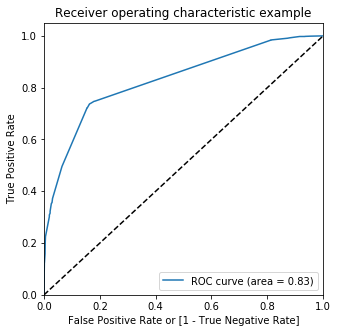

In [339]:
draw_roc(OriginalDataframe.actualtrainyvalues, OriginalDataframe.ourprobabilitydistirbution)

- If the Specificity is more that means (1-Specificity)=FPR and sensitivity is TPR 
- So more TPR and Less FPR the better our model is

In [341]:
numbers=[x/10 for x in range(0,10)]
for i in numbers:
    OriginalDataframe[i]=np.where(OriginalDataframe.ourprobabilitydistirbution>i,1,0)
    
OriginalDataframe.head()   

actualtrainyvalues  ourprobabilitydistirbution  trainyresults  0.0  0.1  \
1943                   0                    0.195681              0    1    1   
456                    0                    0.195681              0    1    1   
6547                   0                    0.568803              1    1    1   
8836                   0                    0.603514              1    1    1   
6529                   1                    0.991784              1    1    1   

      0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  
1943    0    0    0    0    0    0    0    0  
456     0    0    0    0    0    0    0    0  
6547    1    1    1    1    0    0    0    0  
8836    1    1    1    1    1    0    0    0  
6529    1    1    1    1    1    1    1    1

In [343]:
CutoffDataframe=pd.DataFrame(columns=['Probability','sensitivity','specificity','Accuracy'])
numbers=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for x in numbers:
    m=confusion_matrix(OriginalDataframe.actualtrainyvalues,OriginalDataframe[x])
    sensitivity=m[1,1]/(m[1,1]+m[1,0])
    specificity=m[0,0]/(m[0,0]+m[0,1])
    total=sum(sum(m))
    Accuracy=(m[1,1]+m[0,0])/total
    CutoffDataframe.loc[x] =[ x ,sensitivity,specificity,Accuracy]
print(CutoffDataframe)

     Probability  sensitivity  specificity  Accuracy
0.0          0.0     1.000000     0.000000  0.373799
0.1          0.1     0.984414     0.187076  0.485120
0.2          0.2     0.747683     0.818959  0.792316
0.3          0.3     0.738416     0.835554  0.799244
0.4          0.4     0.734625     0.838572  0.799717
0.5          0.5     0.721988     0.846115  0.799717
0.6          0.6     0.495788     0.935881  0.771375
0.7          0.7     0.353833     0.973347  0.741773
0.8          0.8     0.322662     0.978376  0.733270
0.9          0.9     0.238416     0.992457  0.710597


In [344]:
CutoffDataframe

Probability  sensitivity  specificity  Accuracy
0.0          0.0     1.000000     0.000000  0.373799
0.1          0.1     0.984414     0.187076  0.485120
0.2          0.2     0.747683     0.818959  0.792316
0.3          0.3     0.738416     0.835554  0.799244
0.4          0.4     0.734625     0.838572  0.799717
0.5          0.5     0.721988     0.846115  0.799717
0.6          0.6     0.495788     0.935881  0.771375
0.7          0.7     0.353833     0.973347  0.741773
0.8          0.8     0.322662     0.978376  0.733270
0.9          0.9     0.238416     0.992457  0.710597

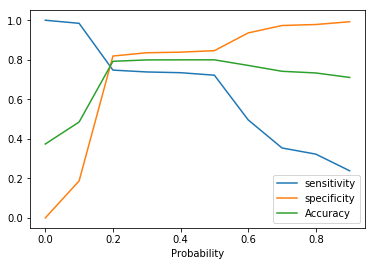

In [345]:
CutoffDataframe.plot.line(x='Probability',y=['sensitivity','specificity','Accuracy'])

#### Its strange that the Cutoff we are getting is 0.2  I think so I have done something wrong lets see the accuracy in test result that will give us the insight were are we

In [346]:
testx

Do_Not_Email  Do_Not_Call  TotalVisits  Total_Time_Spent_on_Website  \
465              0            0          6.0                          351   
5424             0            0          4.0                          685   
3503             0            0          0.0                            0   
4465             0            0          0.0                            0   
5394             0            0          4.0                          164   
7831             0            0          5.0                          164   
2314             0            0          5.0                           22   
7042             0            0          5.0                         1675   
5428             0            0          0.0                            0   
4349             0            0         14.0                          438   
8267             0            0          0.0                            0   
1438             0            0          8.0                          419   
6687             0            0          3.0                         1886   
4759             0            0          0.0                            0   
800              0            0          2.0                          426   
2296             0            0          3.0                         1475   
9235             1            0          8.0                         1845   
8016             0            0          7.0                           96   
623              0            0          0.0                            0   
3075             0            0          8.0                           75   
3213             0            0          3.0                          300   
945              0            0          3.0                          415   
7504             0            0          1.0                          343   
7933             0            0          0.0                            0   
7328             0            0          3.0                          181   
959              0            0          3.0                         1293   
6127             0            0          0.0                            0   
6332             0            0          5.0                          583   
3682             1            0          1.0                           75   
6387             0            0          2.0                          344   
...            ...          ...          ...                          ...   
3110             0            0          0.0                            0   
3574             0            0          4.0                          115   
6015             0            0          1.0                           36   
87               0            0          6.0                           97   
5821             1            0          2.0                          176   
7060             0            0          3.0                         1440   
2352             1            0          0.0                            0   
4097             1            0          1.0                           97   
8520             1            0          4.0                          543   
436              0            0          3.0                           46   
5265             0            0          5.0                          420   
3345             0            0          0.0                            0   
2426             0            0          2.0                          360   
6291             0            0          3.0                          111   
1421             0            0          5.0                         1084   
308              0            0          5.0                         1493   
7815             0            0          8.0                          106   
8739             0            0          6.0                          324   
1562             0            0          2.0                          345   
8342             0            0          5.0                          953   
61

In [347]:
testx.head()

Do_Not_Email  Do_Not_Call  TotalVisits  Total_Time_Spent_on_Website  \
465              0            0          6.0                          351   
5424             0            0          4.0                          685   
3503             0            0          0.0                            0   
4465             0            0          0.0                            0   
5394             0            0          4.0                          164   

      Page_Views_Per_Visit  Search  Newspaper_Article  X_Education_Forums  \
465                   6.00       0                  0                   0   
5424                  4.00       0                  0                   0   
3503                  0.00       0                  0                   0   
4465                  0.00       0                  0                   0   
5394                  1.33       0                  0                   0   

      Newspaper  Digital_Advertisement  Through_Recommendations  \
465           0                      0                        0   
5424          0                      0                        0   
3503          0                      0                        0   
4465          0                      0                        0   
5394          0                      0                        0   

      A_free_copy_of_Mastering_The_Interview  Lead_Origin_API  \
465                                        1                0   
5424                                       0                0   
3503                                       0                1   
4465                                       0                1   
5394                                       0                1   

      Lead_Origin_Landing Page Submission  Lead_Origin_Lead Import  \
465                                     1                        0   
5424                                    1                        0   
3503                                    0                        0   
4465                                    0                        0   
5394                                    0                        0   

      Lead_Source_Click2call  Lead_Source_Direct Traffic  \
465                        0                           0   
5424                       0                           0   
3503                       0                           0   
4465                       0                           0   
5394                       0                           0   

      Lead_Source_Facebook  Lead_Source_Google  Lead_Source_Live Chat  \
465                      0                   1                      0   
5424                     0                   0                      0   
3503                     0                   0                      0   
4465                     0                   0                      0   
5394                     0                   0                      0   

      Lead_Source_NC_EDM  Lead_Source_Olark Chat  Lead_Source_Organic Search  \
465                    0                       0                           0   
5424                   0                       0                           1   
3503                   0                       1                           0   
4465                   0                       1                           0   
5394                   0                       1                           0   

      Lead_Source_Pay per Click Ads  Lead_Source_Press_Release  \
465                               0                          0   
5424                              0                          0   
3503                              0                          0   
4465                              0                          0   
5394                              0                          0   

      Lead_Source_Reference  Lead_Source_Referral Sites  \
465                       0                           0   
5424                      0                           0   
3503      

In [348]:
#testx['Total Time Spent on Website']=s.transform(testx['Total Time Spent on Website'].values.reshape(-1,1))
#testx['Page Views Per Visit']=s.transform(testx['Page Views Per Visit'].values.reshape(-1,1))
#testx['Asymmetrique Activity Score']=s.transform(testx['Asymmetrique Activity Score'].values.reshape(-1,1))
#testx['Asymmetrique Profile Score']=s.transform(testx['Asymmetrique Profile Score'].values.reshape(-1,1))


#testx['TotalVisits']=s.transform(testx['TotalVisits'].values.reshape(-1,1))

In [349]:
testx.head()

Do_Not_Email  Do_Not_Call  TotalVisits  Total_Time_Spent_on_Website  \
465              0            0          6.0                          351   
5424             0            0          4.0                          685   
3503             0            0          0.0                            0   
4465             0            0          0.0                            0   
5394             0            0          4.0                          164   

      Page_Views_Per_Visit  Search  Newspaper_Article  X_Education_Forums  \
465                   6.00       0                  0                   0   
5424                  4.00       0                  0                   0   
3503                  0.00       0                  0                   0   
4465                  0.00       0                  0                   0   
5394                  1.33       0                  0                   0   

      Newspaper  Digital_Advertisement  Through_Recommendations  \
465           0                      0                        0   
5424          0                      0                        0   
3503          0                      0                        0   
4465          0                      0                        0   
5394          0                      0                        0   

      A_free_copy_of_Mastering_The_Interview  Lead_Origin_API  \
465                                        1                0   
5424                                       0                0   
3503                                       0                1   
4465                                       0                1   
5394                                       0                1   

      Lead_Origin_Landing Page Submission  Lead_Origin_Lead Import  \
465                                     1                        0   
5424                                    1                        0   
3503                                    0                        0   
4465                                    0                        0   
5394                                    0                        0   

      Lead_Source_Click2call  Lead_Source_Direct Traffic  \
465                        0                           0   
5424                       0                           0   
3503                       0                           0   
4465                       0                           0   
5394                       0                           0   

      Lead_Source_Facebook  Lead_Source_Google  Lead_Source_Live Chat  \
465                      0                   1                      0   
5424                     0                   0                      0   
3503                     0                   0                      0   
4465                     0                   0                      0   
5394                     0                   0                      0   

      Lead_Source_NC_EDM  Lead_Source_Olark Chat  Lead_Source_Organic Search  \
465                    0                       0                           0   
5424                   0                       0                           1   
3503                   0                       1                           0   
4465                   0                       1                           0   
5394                   0                       1                           0   

      Lead_Source_Pay per Click Ads  Lead_Source_Press_Release  \
465                               0                          0   
5424                              0                          0   
3503                              0                          0   
4465                              0                          0   
5394                              0                          0   

      Lead_Source_Reference  Lead_Source_Referral Sites  \
465                       0                           0   
5424                      0                           0   
3503      

In [350]:
testx[['Total_Time_Spent_on_Website','Page_Views_Per_Visit','TotalVisits',]] = s.transform(testx[['Total_Time_Spent_on_Website','Page_Views_Per_Visit','TotalVisits']])

In [351]:
testx

Do_Not_Email  Do_Not_Call  TotalVisits  Total_Time_Spent_on_Website  \
465              0            0     0.536923                    73.125907   
5424             0            0     0.116117                   143.400460   
3503             0            0    -0.725494                    -0.725494   
4465             0            0    -0.725494                    -0.725494   
5394             0            0     0.116117                    33.780574   
7831             0            0     0.326520                    33.780574   
2314             0            0     0.326520                     3.903369   
7042             0            0     0.326520                   351.699285   
5428             0            0    -0.725494                    -0.725494   
4349             0            0     2.220146                    91.430956   
8267             0            0    -0.725494                    -0.725494   
1438             0            0     0.957729                    87.433301   
6687             0            0    -0.094285                   396.094287   
4759             0            0    -0.725494                    -0.725494   
800              0            0    -0.304688                    88.906121   
2296             0            0    -0.094285                   309.618714   
9235             1            0     0.957729                   387.467770   
8016             0            0     0.747326                    19.473180   
623              0            0    -0.725494                    -0.725494   
3075             0            0     0.957729                    15.054720   
3213             0            0    -0.094285                    62.395362   
945              0            0    -0.094285                    86.591690   
7504             0            0    -0.515091                    71.442685   
7933             0            0    -0.725494                    -0.725494   
7328             0            0    -0.094285                    37.357422   
959              0            0    -0.094285                   271.325395   
6127             0            0    -0.725494                    -0.725494   
6332             0            0     0.326520                   121.939369   
3682             1            0    -0.515091                    15.054720   
6387             0            0    -0.304688                    71.653087   
...            ...          ...          ...                          ...   
3110             0            0    -0.725494                    -0.725494   
3574             0            0     0.116117                    23.470834   
6015             0            0    -0.515091                     6.849009   
87               0            0     0.536923                    19.683583   
5821             1            0    -0.304688                    36.305408   
7060             0            0    -0.094285                   302.254614   
2352             1            0    -0.725494                    -0.725494   
4097             1            0    -0.515091                    19.683583   
8520             1            0     0.116117                   113.523255   
436              0            0    -0.094285                     8.953037   
5265             0            0     0.326520                    87.643704   
3345             0            0    -0.725494                    -0.725494   
2426             0            0    -0.304688                    75.019533   
6291             0            0    -0.094285                    22.629223   
1421             0            0     0.326520                   227.351199   
308              0            0     0.326520                   313.405966   
7815             0            0     0.957729                    21.577208   
8739             0            0     0.536923                    67.445030   
1562             0            0    -0.304688                    71.863490   
8342             0            0     0.326520                   199.788425   
61

In [352]:
#newtestx=sm.add_constant(testx)

In [353]:
#newtestx

In [354]:
#finallogisticmodel.predict(newtestx)

In [355]:
testx.shape

(2723, 111)

In [356]:
testx.head()

Do_Not_Email  Do_Not_Call  TotalVisits  Total_Time_Spent_on_Website  \
465              0            0     0.536923                    73.125907   
5424             0            0     0.116117                   143.400460   
3503             0            0    -0.725494                    -0.725494   
4465             0            0    -0.725494                    -0.725494   
5394             0            0     0.116117                    33.780574   

      Page_Views_Per_Visit  Search  Newspaper_Article  X_Education_Forums  \
465               0.536923       0                  0                   0   
5424              0.116117       0                  0                   0   
3503             -0.725494       0                  0                   0   
4465             -0.725494       0                  0                   0   
5394             -0.445658       0                  0                   0   

      Newspaper  Digital_Advertisement  Through_Recommendations  \
465           0                      0                        0   
5424          0                      0                        0   
3503          0                      0                        0   
4465          0                      0                        0   
5394          0                      0                        0   

      A_free_copy_of_Mastering_The_Interview  Lead_Origin_API  \
465                                        1                0   
5424                                       0                0   
3503                                       0                1   
4465                                       0                1   
5394                                       0                1   

      Lead_Origin_Landing Page Submission  Lead_Origin_Lead Import  \
465                                     1                        0   
5424                                    1                        0   
3503                                    0                        0   
4465                                    0                        0   
5394                                    0                        0   

      Lead_Source_Click2call  Lead_Source_Direct Traffic  \
465                        0                           0   
5424                       0                           0   
3503                       0                           0   
4465                       0                           0   
5394                       0                           0   

      Lead_Source_Facebook  Lead_Source_Google  Lead_Source_Live Chat  \
465                      0                   1                      0   
5424                     0                   0                      0   
3503                     0                   0                      0   
4465                     0                   0                      0   
5394                     0                   0                      0   

      Lead_Source_NC_EDM  Lead_Source_Olark Chat  Lead_Source_Organic Search  \
465                    0                       0                           0   
5424                   0                       0                           1   
3503                   0                       1                           0   
4465                   0                       1                           0   
5394                   0                       1                           0   

      Lead_Source_Pay per Click Ads  Lead_Source_Press_Release  \
465                               0                          0   
5424                              0                          0   
3503                              0                          0   
4465                              0                          0   
5394                              0                          0   

      Lead_Source_Reference  Lead_Source_Referral Sites  \
465                       0                           0   
5424                      0                           0   
3503      

In [357]:
testx=testx[['Lead_Profile_Student of SomeSchool','Lead_Profile_Potential Lead',
               

'Last_Notable_Activity_Had a Phone Conversation','Last_Notable_Activity_Email Bounced',
'Last_Notable_Activity_SMS Sent','Last_Notable_Activity_Unreachable','Do_Not_Email','Lead_Source_Reference',

'Last_Activity_Converted to Lead',
'Last_Activity_Email Bounced',
'What_is_your_current_occupation_Working Professional',
'What_is_your_current_occupation_Unemployed',
'Lead_Source_Welingak Website']]

In [358]:
testx

Lead_Profile_Student of SomeSchool  Lead_Profile_Potential Lead  \
465                                    0                            0   
5424                                   0                            0   
3503                                   0                            1   
4465                                   0                            0   
5394                                   0                            0   
7831                                   0                            0   
2314                                   0                            0   
7042                                   0                            0   
5428                                   0                            0   
4349                                   0                            1   
8267                                   0                            0   
1438                                   0                            0   
6687                                   0                            0   
4759                                   0                            0   
800                                    0                            0   
2296                                   0                            0   
9235                                   0                            1   
8016                                   0                            0   
623                                    0                            1   
3075                                   0                            0   
3213                                   0                            1   
945                                    0                            0   
7504                                   0                            0   
7933                                   0                            0   
7328                                   0                            0   
959                                    0                            0   
6127                                   0                            0   
6332                                   0                            1   
3682                                   0                            0   
6387                                   1                            0   
...                                  ...                          ...   
3110                                   0                            0   
3574                                   0                            0   
6015                                   0                            1   
87                                     0                            0   
5821                                   0                            0   
7060                                   0                            0   
2352                                   0                            0   
4097                                   0                            0   
8520                                   0                            0   
436                                    0                            0   
5265                                   0                            0   
3345                                   0                            0   
2426                                   0                            0   
6291                                   0                            0   
1421                                   0                            0   
308                                    0                            0   
7815                                   0                            0   
8739                                   0                            1   
1562                                   0                            0   
8342                                   0                            0   
6153                                   0                            0   
1693                                   0                            0   
3353                                   0                        

In [359]:
testx.shape

(2723, 13)

In [360]:
newtestx=sm.add_constant(testx)

In [361]:
finallogisticmodel.predict(newtestx).head()

465     0.195681
5424    0.195681
3503    0.603514
4465    0.195681
5394    0.195681
dtype: float64

In [362]:
final=pd.DataFrame({'testyactualvalues':testy,'testycalculatedvalues':finallogisticmodel.predict(newtestx)})

In [363]:
final.head()

testyactualvalues  testycalculatedvalues
465                   0               0.195681
5424                  0               0.195681
3503                  0               0.603514
4465                  0               0.195681
5394                  0               0.195681

In [365]:
final['testyfinalresults']=np.where(final.testycalculatedvalues>.2,1,0)

In [366]:
final.head()

testyactualvalues  testycalculatedvalues  testyfinalresults
465                   0               0.195681                  0
5424                  0               0.195681                  0
3503                  0               0.603514                  1
4465                  0               0.195681                  0
5394                  0               0.195681                  0

In [367]:
m=confusion_matrix(final.testyactualvalues,final.testyfinalresults)

In [368]:
print(accuracy_score(final.testyactualvalues,final.testyfinalresults))

0.7928755049577672


In [369]:
sensitivity=m[1,1]/(m[1,1]+m[1,0])
specificity=m[0,0]/(m[0,0]+m[0,1])

print('Sensitivity-----------'+str(sensitivity))
print('Specificity-----------'+str(specificity))

Sensitivity-----------0.7464655984919887
Specificity-----------0.822503008423586


In [370]:
m

array([[1367,  295],
       [ 269,  792]], dtype=int64)

# Inference & conclusions

1.	Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?

###### ANSWER: Features in the final model: Lead Origin, Lead Source, Do Not Email, Last Activity, Specialization, Newspaper Article, Digital Advertisement, Lead Quality, City, Last Notable Activity


2.	What are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion?

###### ANSWER: The Top 3 Categorical Variables Lead Origin, Lead Source, Do Not Email


3.	X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.

##### ANSWER: Strategy with more manpower Sort the customers based on the probability of conversion and call only the top n for the day. n is a number which can be decided based on the business sense.


4.	Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.

##### ANSWER: Strategy when targets have been achieved Build another model (such as a recommender system) which can predict which course a lead is likely to buy. Only call that lead if the revenue from the course and the probability of a lead are above a certain thresholds. These threshold values must be decided based on the business requirement.


                                        #########################################
                                        ############## Thank you#################
                                        #########################################    